# Crisp DM Workflow

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading Data set

In [2]:
df = pd.read_csv("pollutant-standards-index-southtangerang-2020-2022.csv")
df

Date  PM2.5  PM10  SO2  CO    O3  NO2  Max Critical Component  \
0       1/1/2020     45    30    2  69  19.0    0   69                 CO   
1       1/2/2020     44    16    2  58  33.0    0   58                 CO   
2       1/3/2020     43    12    2  46  18.0    0   46                 CO   
3       1/4/2020     40     8    2  84  29.0    0   84                 CO   
4       1/5/2020     38     8    3  50   0.0    0   50                 CO   
...          ...    ...   ...  ...  ..   ...  ...  ...                ...   
1091  12/27/2022     50    19   16  12   NaN    4   19              PM2.5   
1092  12/28/2022     51    20   16  12   NaN    4   20              PM2.5   
1093  12/29/2022     52    21   16  13   NaN    4   21              PM2.5   
1094  12/30/2022     53    22   17  13   NaN    4   22              PM2.5   
1095  12/31/2022     53    23   17  14   NaN    4   23              PM2.5   

      Category  
0     Moderate  
1     Moderate  
2         Good  
3     Moderate  
4         Good  
...        ...  
1091  Moderate  
1092  Moderate  
1093  Moderate  
1094  Moderate  
1095  Moderate  

[1096 rows x 10 columns]

# Data Understanding

## Penjelasan Feature dataset

In [3]:
feature_dataset = pd.Series(["Date","PM10","SO2","CO","O3","NO2","Max","Critical Component","Categoy"],index=[1,2,3,4,5,6,7,8,9])
penjelasan_feature = pd.Series(["Tanggal pengukuran","Pengukuran Materi Partikulat","Pengukuran Sulfur Dioksida","Pengukuran Karbon Monoksida","Pengukuran ozon","Pengukuran Natrium DIoksida","Nilai pengukuran tertinggi","Komponen nilai pengukuran tertinggi","Kategori pencemaran udara baik atau tidak"],index=[1,2,3,4,5,6,7,8,9])

deskripsi_variabel = pd.DataFrame({"Nama Feature":feature_dataset,
                                  "Penjelasan":penjelasan_feature})
deskripsi_variabel

Nama Feature                                 Penjelasan
1                Date                         Tanggal pengukuran
2                PM10               Pengukuran Materi Partikulat
3                 SO2                 Pengukuran Sulfur Dioksida
4                  CO                Pengukuran Karbon Monoksida
5                  O3                            Pengukuran ozon
6                 NO2                Pengukuran Natrium DIoksida
7                 Max                 Nilai pengukuran tertinggi
8  Critical Component        Komponen nilai pengukuran tertinggi
9             Categoy  Kategori pencemaran udara baik atau tidak

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1096 non-null   object 
 1   PM2.5               1096 non-null   int64  
 2   PM10                1096 non-null   int64  
 3   SO2                 1096 non-null   int64  
 4   CO                  1096 non-null   int64  
 5   O3                  1036 non-null   float64
 6   NO2                 1096 non-null   int64  
 7   Max                 1096 non-null   int64  
 8   Critical Component  1096 non-null   object 
 9   Category            1096 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 85.8+ KB


## Statistik Deskriptif

In [5]:
df.describe()

PM2.5         PM10          SO2           CO           O3  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1036.000000   
mean     44.193431    18.738139    10.580292    18.820255    20.960425   
std      10.826190     7.290818     8.068708    17.066338    12.467208   
min      19.000000     3.000000     0.000000     0.000000     0.000000   
25%      35.000000    13.000000     1.000000    10.000000    15.000000   
50%      45.000000    17.000000    14.000000    12.000000    20.000000   
75%      53.000000    23.000000    16.000000    21.000000    26.000000   
max      66.000000    60.000000    28.000000   164.000000    81.000000   

               NO2          Max  
count  1096.000000  1096.000000  
mean      2.374088    29.235401  
std       2.227808    15.907933  
min       0.000000    11.000000  
25%       0.000000    20.000000  
50%       3.000000    24.000000  
75%       4.000000    31.000000  
max       8.000000   164.000000

In [6]:
df["Critical Component"].value_counts()

PM2.5       615
CO          222
O3          181
PM10         70
PM10,O3       4
CO, PM10      2
PM10, CO      1
PM10,CO       1
Name: Critical Component, dtype: int64

# Data Prepatration

## Data Cleansing

### Mengecek nilai hilang

In [7]:
df.isna().sum()

Date                   0
PM2.5                  0
PM10                   0
SO2                    0
CO                     0
O3                    60
NO2                    0
Max                    0
Critical Component     0
Category               0
dtype: int64

### Mengisi Missing value dengan nilai Mean pada O3

In [8]:
df["O3"] = df["O3"].fillna(df["O3"].mean())

In [9]:
df.isna().sum()

Date                  0
PM2.5                 0
PM10                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
dtype: int64

In [10]:
df.describe()

PM2.5         PM10          SO2           CO           O3  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean     44.193431    18.738139    10.580292    18.820255    20.960425   
std      10.826190     7.290818     8.068708    17.066338    12.120829   
min      19.000000     3.000000     0.000000     0.000000     0.000000   
25%      35.000000    13.000000     1.000000    10.000000    15.000000   
50%      45.000000    17.000000    14.000000    12.000000    20.000000   
75%      53.000000    23.000000    16.000000    21.000000    25.000000   
max      66.000000    60.000000    28.000000   164.000000    81.000000   

               NO2          Max  
count  1096.000000  1096.000000  
mean      2.374088    29.235401  
std       2.227808    15.907933  
min       0.000000    11.000000  
25%       0.000000    20.000000  
50%       3.000000    24.000000  
75%       4.000000    31.000000  
max       8.000000   164.000000

## NOrmalisasi dengan minamx scaler

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Data X yang akan dinormalisasi (kecuali 'IE EXP (%)')
X_data = df[['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max']]

# Inisialisasi MinMaxScaler untuk X
scaler_X = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X_data)

# Mengganti kolom-kolom dalam data_model dengan data yang sudah dinormalisasi
df[['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max']] = X_normalized

# Kolom 'IE EXP (%)' tidak perlu dinormalisasi
# Sekarang Anda dapat menggabungkan data yang sudah dinormalisasi dengan 'IE EXP (%)'
df = df

In [27]:
df

Date     PM2.5      PM10       SO2        CO        O3  NO2  \
0       1/1/2020  0.553191  0.473684  0.071429  0.420732  0.234568  0.0   
1       1/2/2020  0.531915  0.228070  0.071429  0.353659  0.407407  0.0   
2       1/3/2020  0.510638  0.157895  0.071429  0.280488  0.222222  0.0   
3       1/4/2020  0.446809  0.087719  0.071429  0.512195  0.358025  0.0   
4       1/5/2020  0.404255  0.087719  0.107143  0.304878  0.000000  0.0   
...          ...       ...       ...       ...       ...       ...  ...   
1091  12/27/2022  0.659574  0.280702  0.571429  0.073171  0.258771  0.5   
1092  12/28/2022  0.680851  0.298246  0.571429  0.073171  0.258771  0.5   
1093  12/29/2022  0.702128  0.315789  0.571429  0.079268  0.258771  0.5   
1094  12/30/2022  0.723404  0.333333  0.607143  0.079268  0.258771  0.5   
1095  12/31/2022  0.723404  0.350877  0.607143  0.085366  0.258771  0.5   

           Max Critical Component  Category  
0     0.379085                 CO  Moderate  
1     0.307190                 CO  Moderate  
2     0.228758                 CO      Good  
3     0.477124                 CO  Moderate  
4     0.254902                 CO      Good  
...        ...                ...       ...  
1091  0.052288              PM2.5  Moderate  
1092  0.058824              PM2.5  Moderate  
1093  0.065359              PM2.5  Moderate  
1094  0.071895              PM2.5  Moderate  
1095  0.078431              PM2.5  Moderate  

[1096 rows x 10 columns]

### Mengecek Outlier

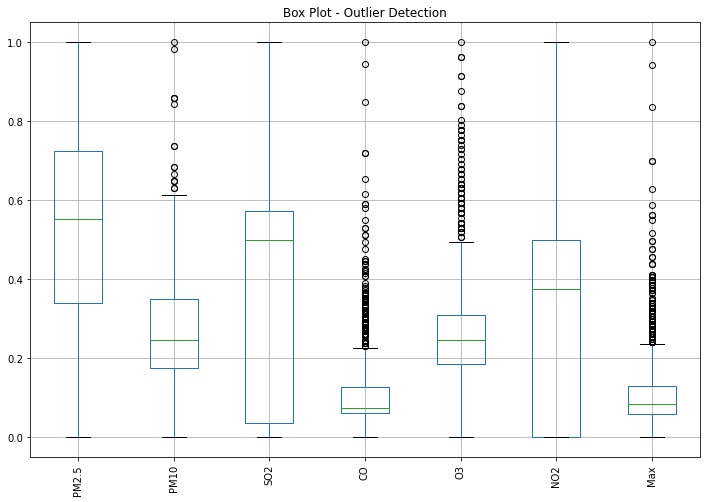

In [12]:
# Membuat box plot untuk setiap kolom
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot - Outlier Detection')
plt.xticks(rotation=90)
plt.show()

# MOdeling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## XGBOOST


Ratio 20:80
Accuracy: 0.8318181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78        76
           1       0.88      0.89      0.89       130
           2       0.64      0.50      0.56        14

    accuracy                           0.83       220
   macro avg       0.76      0.73      0.74       220
weighted avg       0.83      0.83      0.83       220



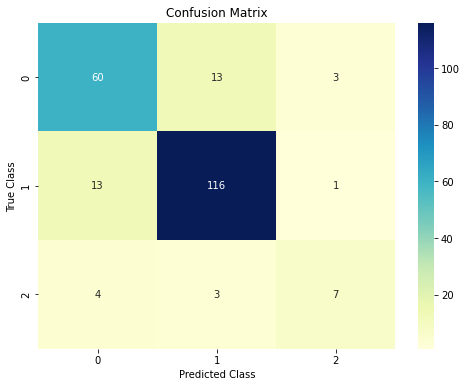

AUC Class Good: 0.94
AUC Class Moderate: 0.95
AUC Class Unhealthy: 0.98
Log Loss: 0.3996


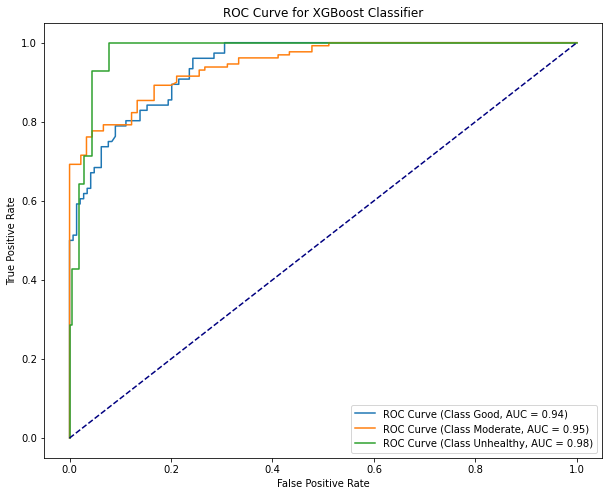


Ratio 30:70
Accuracy: 0.8206686930091185
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       117
           1       0.85      0.88      0.87       193
           2       0.61      0.58      0.59        19

    accuracy                           0.82       329
   macro avg       0.75      0.74      0.75       329
weighted avg       0.82      0.82      0.82       329



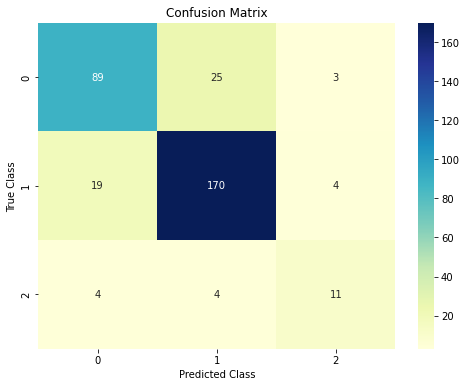

AUC Class Good: 0.94
AUC Class Moderate: 0.94
AUC Class Unhealthy: 0.98
Log Loss: 0.4311


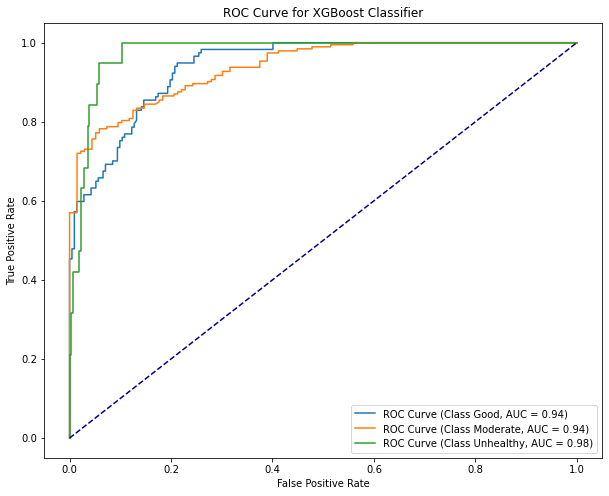


Ratio 40:60
Accuracy: 0.8086560364464692
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.72      0.75       155
           1       0.83      0.88      0.86       259
           2       0.64      0.56      0.60        25

    accuracy                           0.81       439
   macro avg       0.75      0.72      0.74       439
weighted avg       0.81      0.81      0.81       439



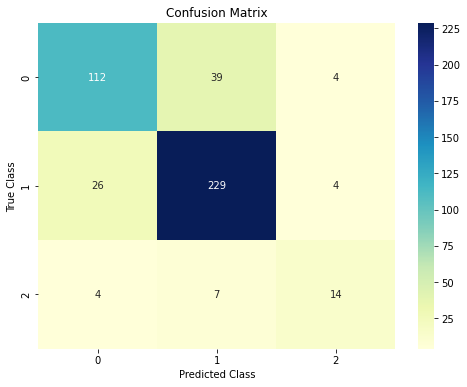

AUC Class Good: 0.93
AUC Class Moderate: 0.92
AUC Class Unhealthy: 0.95
Log Loss: 0.4560


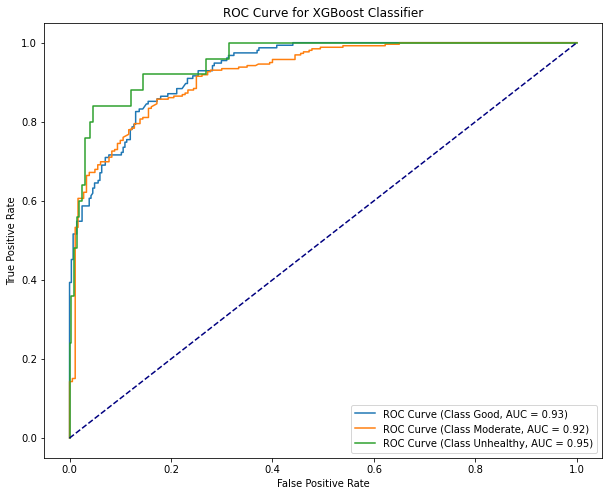

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, log_loss, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split

# Splitting data
X = df.drop(["Category", "Date", "Critical Component"], axis=1)
y = df["Category"]

# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
    # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Membuat model XGBoost
    xgb_classifier = XGBClassifier(random_state=42)

    # Melatih model
    xgb_classifier.fit(X_train, y_train_encoded)

    # Melakukan prediksi pada data testing
    y_pred = xgb_classifier.predict(X_test)

    # Mengukur akurasi model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)

    # Menampilkan classification report
    report = classification_report(y_test_encoded, y_pred)
    print("Classification Report:\n", report)

    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = xgb_classifier.predict_proba(X_test)

    # Memvisualisasikan Confusion Matrix
    confusion_mat = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i in range(xgb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i in range(xgb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for XGBoost Classifier')
    plt.legend()

    # Menghitung log loss
    logloss = log_loss(y_test_encoded, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()


## AdaBoost 


Ratio 20:80
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.76      0.54        76
           1       0.73      0.35      0.47       130
           2       0.35      0.50      0.41        14

    accuracy                           0.50       220
   macro avg       0.50      0.54      0.47       220
weighted avg       0.60      0.50      0.49       220



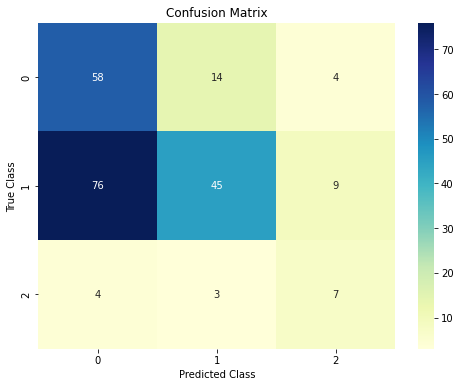

AUC Class Good: 0.55
AUC Class Moderate: 0.65
AUC Class Unhealthy: 0.94
Log Loss: 0.9124


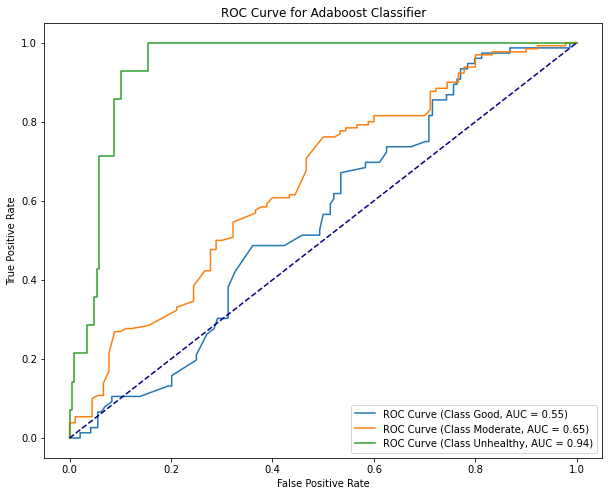


Ratio 30:70
Accuracy: 0.46808510638297873
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.62      0.48       117
           1       0.62      0.37      0.46       193
           2       0.36      0.53      0.43        19

    accuracy                           0.47       329
   macro avg       0.46      0.51      0.46       329
weighted avg       0.52      0.47      0.47       329



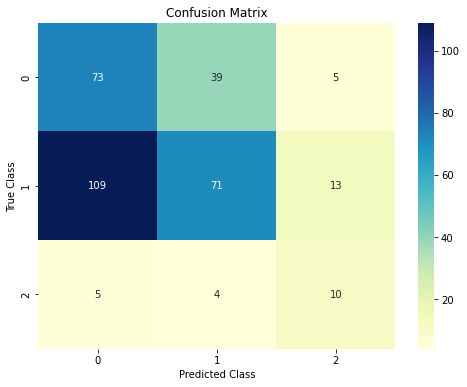

AUC Class Good: 0.50
AUC Class Moderate: 0.63
AUC Class Unhealthy: 0.95
Log Loss: 0.8827


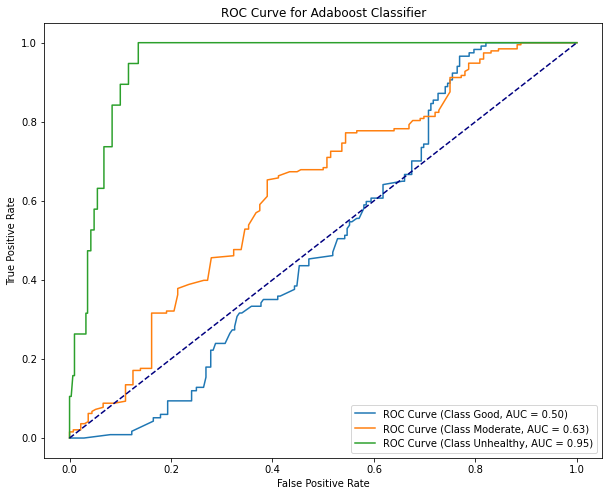


Ratio 40:60
Accuracy: 0.4533029612756264
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.74      0.51       155
           1       0.64      0.26      0.37       259
           2       0.42      0.64      0.51        25

    accuracy                           0.45       439
   macro avg       0.48      0.55      0.46       439
weighted avg       0.54      0.45      0.43       439



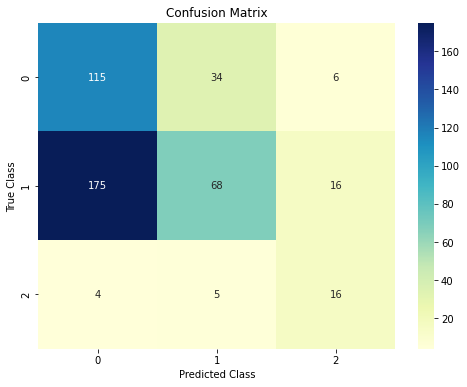

AUC Class Good: 0.52
AUC Class Moderate: 0.64
AUC Class Unhealthy: 0.95
Log Loss: 0.8599


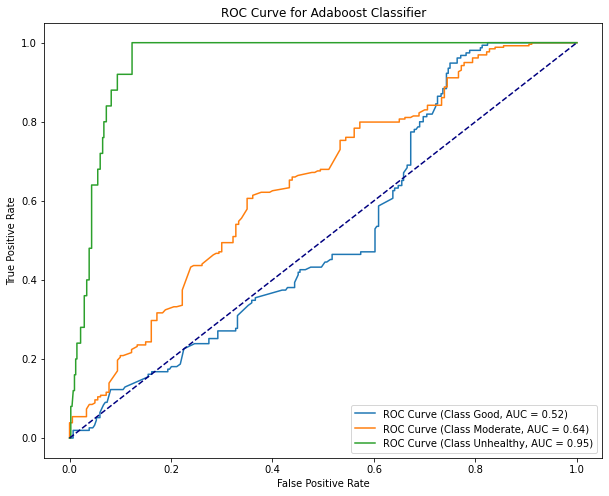

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split

# Splitting data
X = df.drop(["Category", "Date", "Critical Component"], axis=1)
y = df["Category"]

# List of ratios
ratios = [0.2, 0.3, 0.4]
# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
    # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Membuat model Adaboost dengan Decision Tree Classifier sebagai base estimator
    ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

    # Melatih model
    ada_classifier.fit(X_train, y_train_encoded)

    # Melakukan prediksi pada data testing
    y_pred = ada_classifier.predict(X_test)

    # Menghitung matriks kebingungan
    confusion_mat = confusion_matrix(y_test_encoded, y_pred)

    # Mengukur akurasi model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)

    # Menampilkan classification report
    report = classification_report(y_test_encoded, y_pred)
    print("Classification Report:\n", report)

    # Memvisualisasikan Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    
    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = ada_classifier.predict_proba(X_test)

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i in range(ada_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i in range(ada_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Adaboost Classifier')
    plt.legend()

    # Menghitung log loss
    logloss = log_loss(y_test_encoded, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()


## Gradient Boosting Clasifire


Ratio 20:80
Accuracy: 0.8272727272727273
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        76
           1       0.87      0.89      0.88       130
           2       0.64      0.50      0.56        14

    accuracy                           0.83       220
   macro avg       0.76      0.72      0.74       220
weighted avg       0.82      0.83      0.82       220



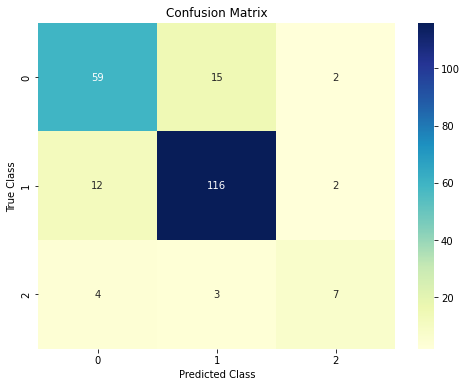

AUC Class Good: 0.92
AUC Class Moderate: 0.93
AUC Class Unhealthy: 0.97
Log Loss: 0.4361


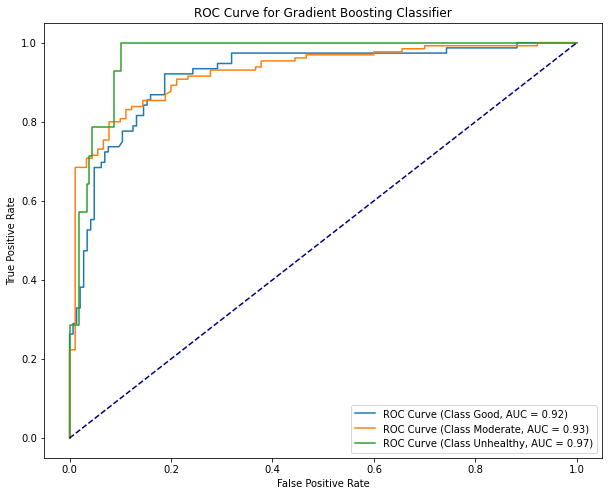


Ratio 30:70
Accuracy: 0.8145896656534954
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76       117
           1       0.86      0.87      0.86       193
           2       0.65      0.58      0.61        19

    accuracy                           0.81       329
   macro avg       0.76      0.74      0.75       329
weighted avg       0.81      0.81      0.81       329



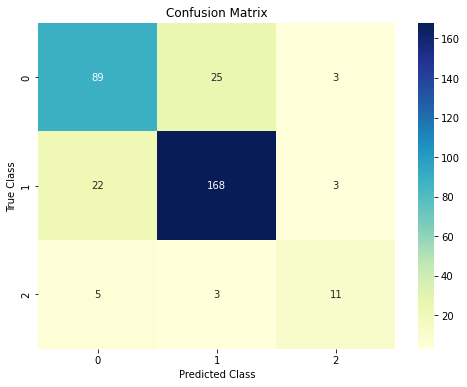

AUC Class Good: 0.92
AUC Class Moderate: 0.93
AUC Class Unhealthy: 0.98
Log Loss: 0.4102


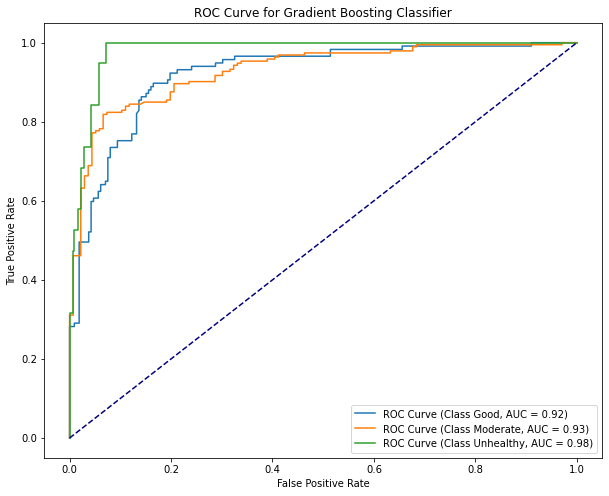


Ratio 40:60
Accuracy: 0.8132118451025057
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       155
           1       0.84      0.88      0.86       259
           2       0.67      0.56      0.61        25

    accuracy                           0.81       439
   macro avg       0.76      0.73      0.74       439
weighted avg       0.81      0.81      0.81       439



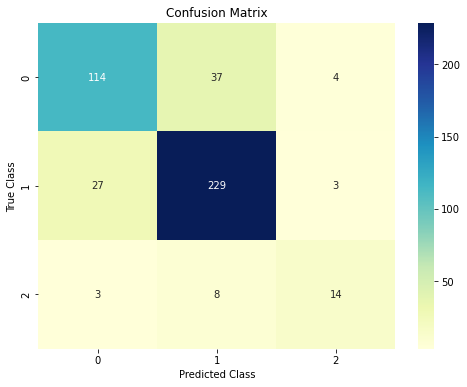

AUC Class Good: 0.92
AUC Class Moderate: 0.90
AUC Class Unhealthy: 0.96
Log Loss: 0.4515


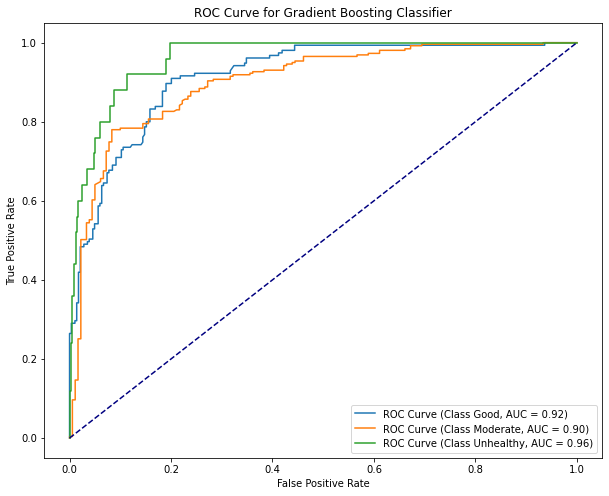

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Splitting data
X = df.drop(["Category", "Date", "Critical Component"], axis=1)
y = df["Category"]

# Encoding string labels to integer labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
    # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=ratio, random_state=42)

    # Membuat model Gradient Boosting
    gb_classifier = GradientBoostingClassifier(random_state=42)

    # Melatih model
    gb_classifier.fit(X_train, y_train)

    # Melakukan prediksi pada data testing
    y_pred = gb_classifier.predict(X_test)

    # Mengukur akurasi model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)

    # Menampilkan classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    
    # Menghitung matriks kebingungan
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Memvisualisasikan Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = gb_classifier.predict_proba(X_test)

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i in range(gb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve((y_test == i).astype(int),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i in range(gb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve((y_test == i).astype(int),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Gradient Boosting Classifier')
    plt.legend()

    # Menghitung log loss
    logloss = log_loss(y_test, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()


## CatBoosting


Ratio 20:80
Accuracy: 0.8454545454545455
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        76
           1       0.87      0.91      0.89       130
           2       0.73      0.57      0.64        14

    accuracy                           0.85       220
   macro avg       0.80      0.76      0.78       220
weighted avg       0.84      0.85      0.84       220



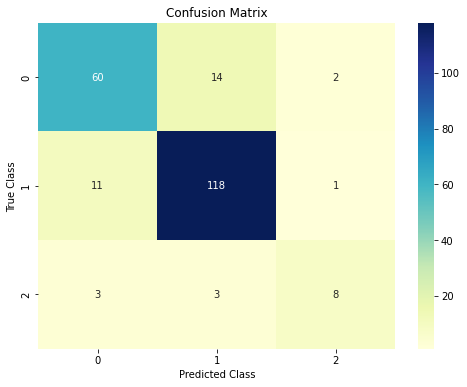

AUC Class 0: 0.95
AUC Class 1: 0.95
AUC Class 2: 0.98
Log Loss: 0.3503


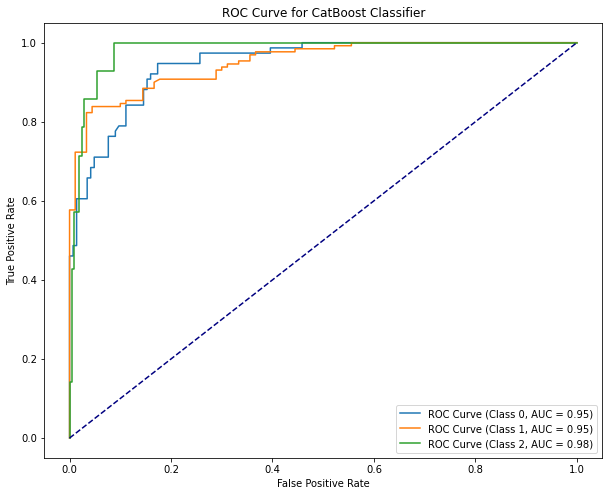


Ratio 30:70
Accuracy: 0.8297872340425532
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       117
           1       0.87      0.87      0.87       193
           2       0.75      0.63      0.69        19

    accuracy                           0.83       329
   macro avg       0.80      0.77      0.78       329
weighted avg       0.83      0.83      0.83       329



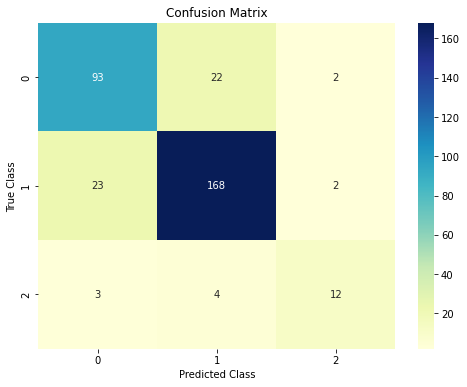

AUC Class 0: 0.94
AUC Class 1: 0.94
AUC Class 2: 0.98
Log Loss: 0.3646


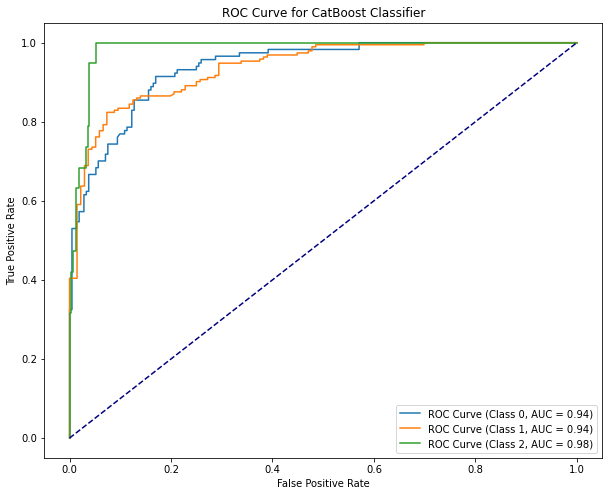


Ratio 40:60
Accuracy: 0.8200455580865603
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       155
           1       0.83      0.90      0.87       259
           2       0.71      0.48      0.57        25

    accuracy                           0.82       439
   macro avg       0.78      0.71      0.74       439
weighted avg       0.82      0.82      0.82       439



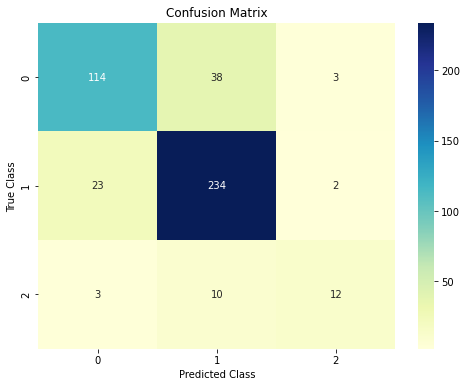

AUC Class 0: 0.94
AUC Class 1: 0.93
AUC Class 2: 0.98
Log Loss: 0.3814


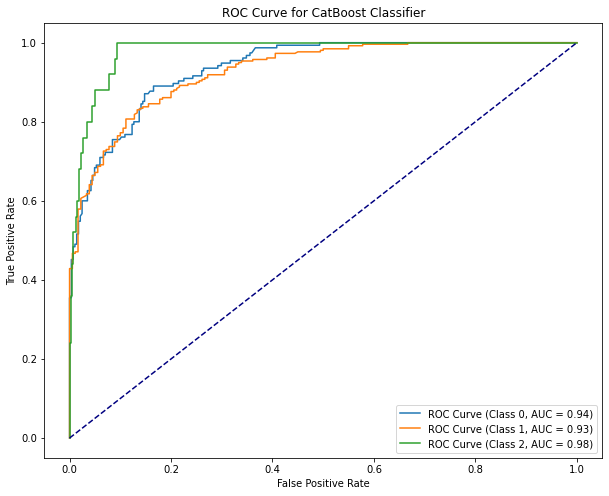

In [17]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Splitting data
X = df.drop(["Category", "Date", "Critical Component"], axis=1)
y = df["Category"]

# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
    # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Membuat model CatBoost
    catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

    # Melatih model
    catboost_classifier.fit(X_train, y_train_encoded)

    # Melakukan prediksi pada data testing
    y_pred = catboost_classifier.predict(X_test)

    # Mengukur akurasi model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)

    # Menampilkan classification report
    report = classification_report(y_test_encoded, y_pred)
    print("Classification Report:\n", report)
    
    # Menghitung matriks kebingungan
    confusion_mat = confusion_matrix(y_test_encoded, y_pred)

    # Memvisualisasikan Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = catboost_classifier.predict_proba(X_test)

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i, class_label in enumerate(catboost_classifier.classes_):
        fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {class_label}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i, class_label in enumerate(catboost_classifier.classes_):
        fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {class_label}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for CatBoost Classifier')
    plt.legend()

    # Menghitung log loss
    logloss = log_loss(y_test_encoded, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()


# Implementasi SMOTE pada Model Boosting dengan HOCV

In [18]:
from imblearn.over_sampling import SMOTE  # imblearn untuk penanganan ketidakseimbangan kelas (Oversampling)
# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42) #Memangil SMOTE dengan random state 42  menghasilkan hasil yang dapat direproduksi secara konsisten. 
X_resampled, y_resampled = smote.fit_resample(X, y) # menyimpan hasil over samping tersebut pada x y resampled

## XGBOOST SMOTE


Ratio 20:80
Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       121
           1       0.92      0.88      0.90       135
           2       0.96      0.98      0.97       128

    accuracy                           0.92       384
   macro avg       0.92      0.92      0.92       384
weighted avg       0.92      0.92      0.92       384



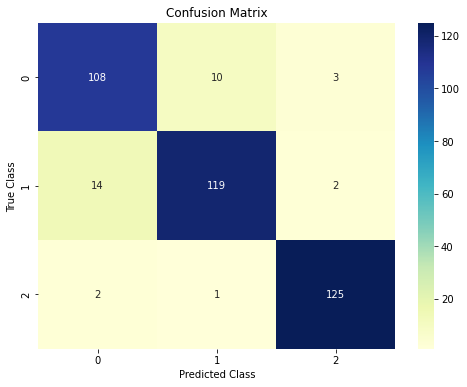

AUC Class Good: 0.98
AUC Class Moderate: 0.98
AUC Class Unhealthy: 1.00
Log Loss: 0.2382


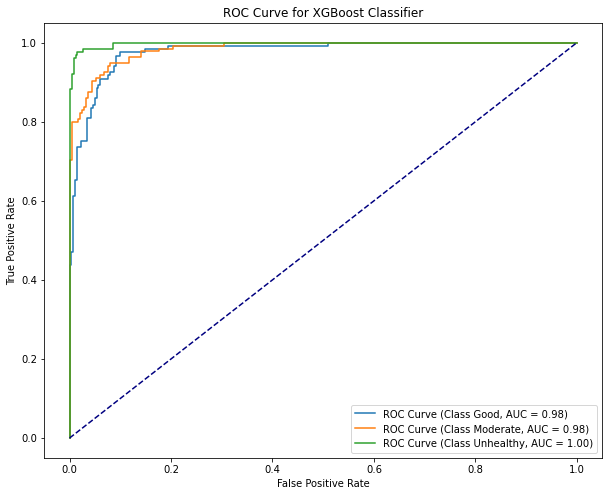


Ratio 30:70
Accuracy: 0.9045138888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       196
           1       0.91      0.84      0.87       195
           2       0.94      0.98      0.96       185

    accuracy                           0.90       576
   macro avg       0.91      0.91      0.90       576
weighted avg       0.90      0.90      0.90       576



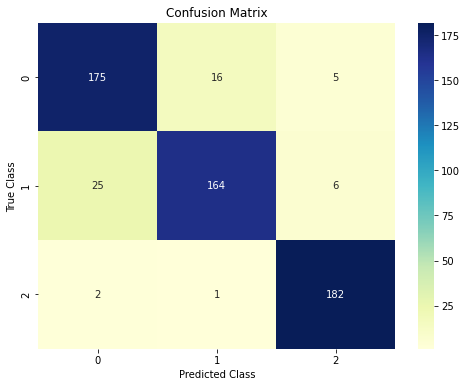

AUC Class Good: 0.97
AUC Class Moderate: 0.98
AUC Class Unhealthy: 0.99
Log Loss: 0.2614


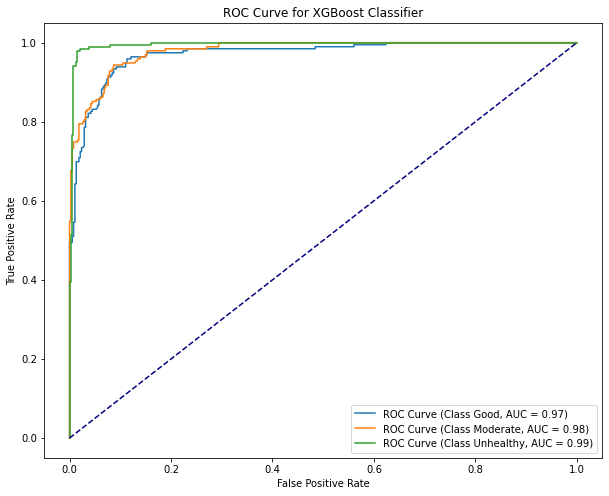


Ratio 40:60
Accuracy: 0.8996088657105606
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       258
           1       0.90      0.83      0.87       255
           2       0.94      0.98      0.96       254

    accuracy                           0.90       767
   macro avg       0.90      0.90      0.90       767
weighted avg       0.90      0.90      0.90       767



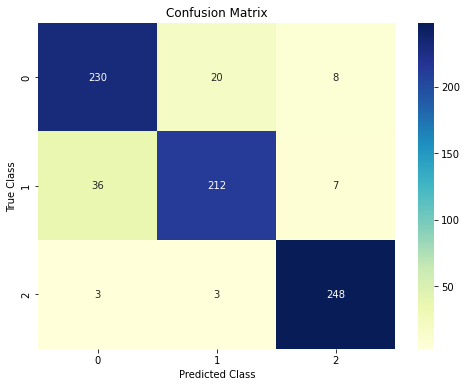

AUC Class Good: 0.97
AUC Class Moderate: 0.98
AUC Class Unhealthy: 1.00
Log Loss: 0.2516


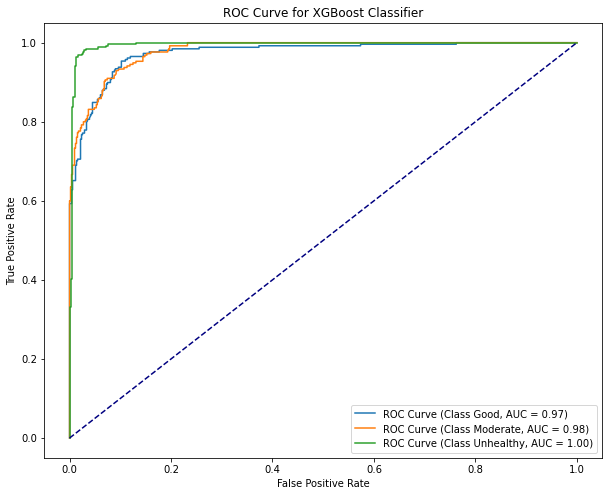

In [19]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
    # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=ratio, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Membuat model XGBoost
    xgb_classifier = XGBClassifier(random_state=42)

    # Melatih model
    xgb_classifier.fit(X_train, y_train_encoded)

    # Melakukan prediksi pada data testing
    y_pred = xgb_classifier.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    report = classification_report(y_test_encoded, y_pred)
    confusion_mat = confusion_matrix(y_test_encoded, y_pred)

    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    # Memvisualisasikan Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = xgb_classifier.predict_proba(X_test)

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i in range(xgb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i in range(xgb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for XGBoost Classifier')
    plt.legend()
    
    # Menghitung log loss
    logloss = log_loss(y_test_encoded, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()
    
    

## ADABoost SMOTE


Ratio 20:80
Accuracy: 0.6432291666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.78      0.61       121
           1       0.57      0.23      0.33       135
           2       0.85      0.95      0.90       128

    accuracy                           0.64       384
   macro avg       0.64      0.65      0.61       384
weighted avg       0.64      0.64      0.61       384



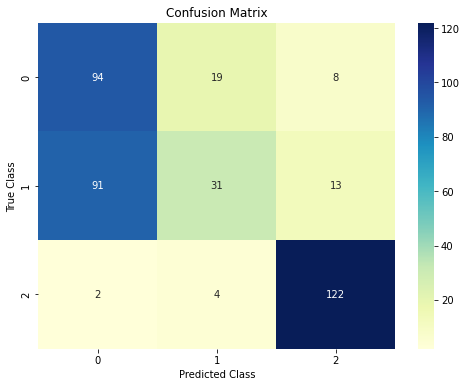

AUC Class Good: 0.74
AUC Class Moderate: 0.77
AUC Class Unhealthy: 0.97
Log Loss: 0.9135


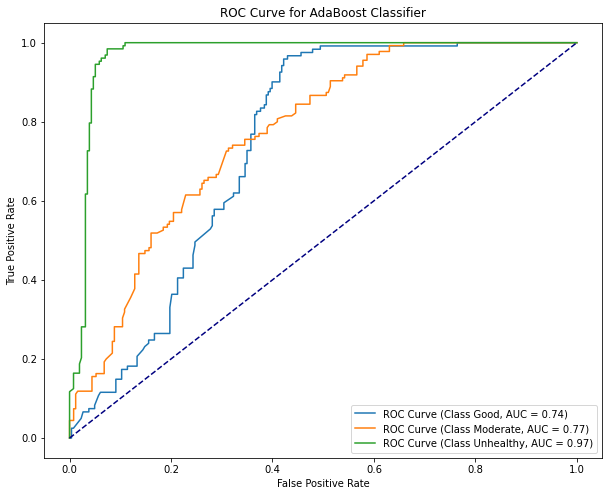


Ratio 30:70
Accuracy: 0.6059027777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.85      0.67       196
           1       0.41      0.24      0.30       195
           2       0.85      0.74      0.79       185

    accuracy                           0.61       576
   macro avg       0.60      0.61      0.59       576
weighted avg       0.60      0.61      0.58       576



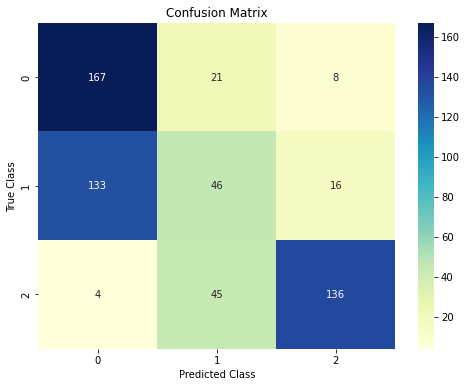

AUC Class Good: 0.73
AUC Class Moderate: 0.67
AUC Class Unhealthy: 0.96
Log Loss: 0.8882


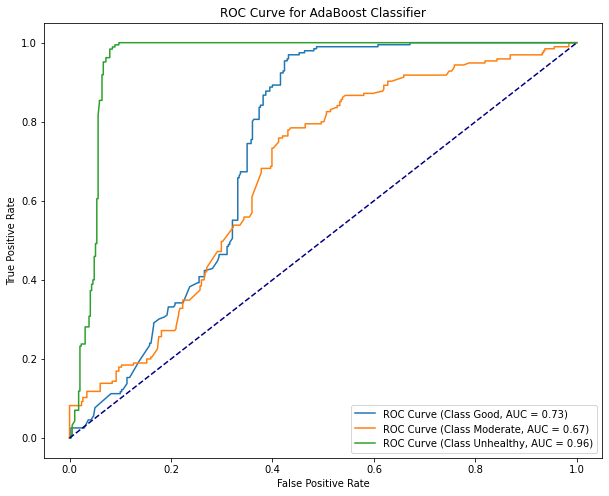


Ratio 40:60
Accuracy: 0.6179921773142112
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.72      0.62       258
           1       0.44      0.31      0.36       255
           2       0.86      0.82      0.84       254

    accuracy                           0.62       767
   macro avg       0.61      0.62      0.61       767
weighted avg       0.61      0.62      0.61       767



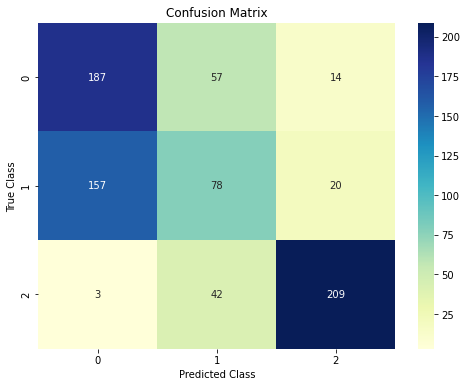

AUC Class Good: 0.77
AUC Class Moderate: 0.70
AUC Class Unhealthy: 0.96
Log Loss: 0.8721


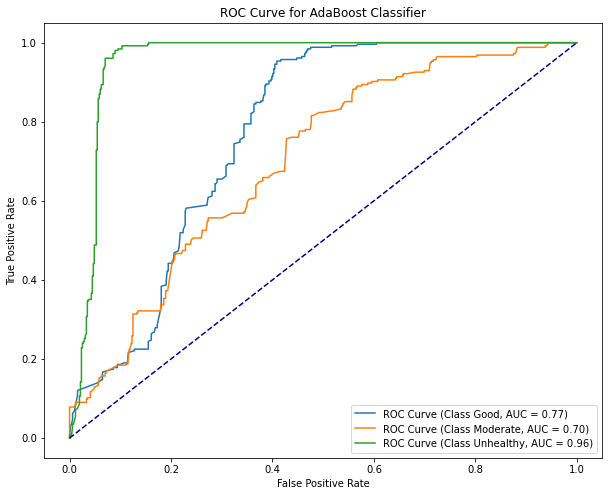

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split

# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
    # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=ratio, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Membuat model Adaboost dengan Decision Tree Classifier sebagai base estimator
    ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

    # Melatih model
    ada_classifier.fit(X_train, y_train_encoded)

    # Melakukan prediksi pada data testing
    y_pred = ada_classifier.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    report = classification_report(y_test_encoded, y_pred)
    confusion_mat = confusion_matrix(y_test_encoded, y_pred)

    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    # Memvisualisasikan Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = ada_classifier.predict_proba(X_test)

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i in range(ada_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i in range(ada_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for AdaBoost Classifier')
    plt.legend()
    
    # Menghitung log loss
    logloss = log_loss(y_test_encoded, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()


## GradientBoosting Clasifire SMOTE


Ratio 20:80
Accuracy: 0.890625
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       121
           1       0.92      0.81      0.87       135
           2       0.92      0.97      0.94       128

    accuracy                           0.89       384
   macro avg       0.89      0.89      0.89       384
weighted avg       0.89      0.89      0.89       384



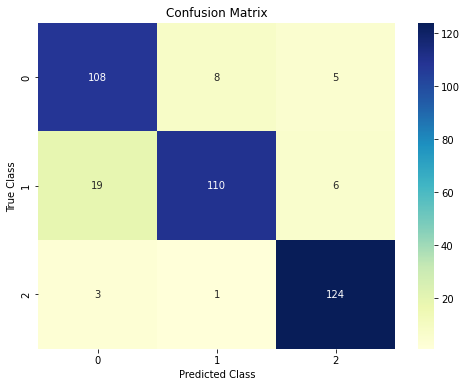

AUC Class Good: 0.96
AUC Class Moderate: 0.96
AUC Class Unhealthy: 1.00
Log Loss: 0.3028


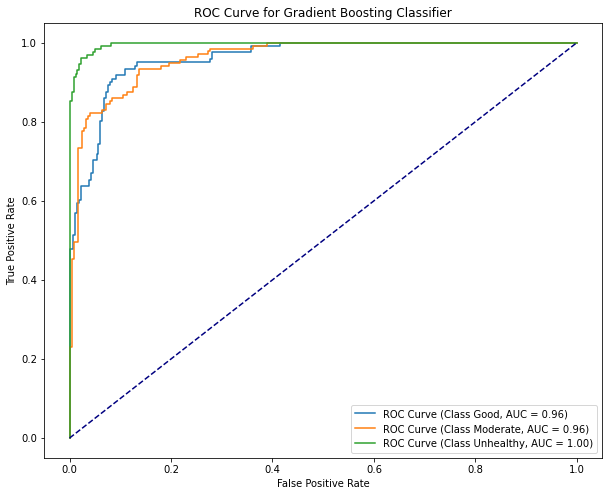


Ratio 30:70
Accuracy: 0.8802083333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       196
           1       0.89      0.80      0.84       195
           2       0.90      0.97      0.94       185

    accuracy                           0.88       576
   macro avg       0.88      0.88      0.88       576
weighted avg       0.88      0.88      0.88       576



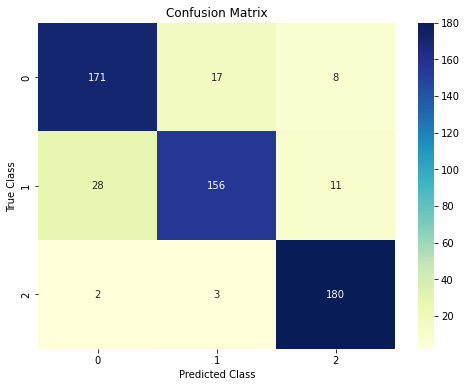

AUC Class Good: 0.96
AUC Class Moderate: 0.95
AUC Class Unhealthy: 1.00
Log Loss: 0.3192


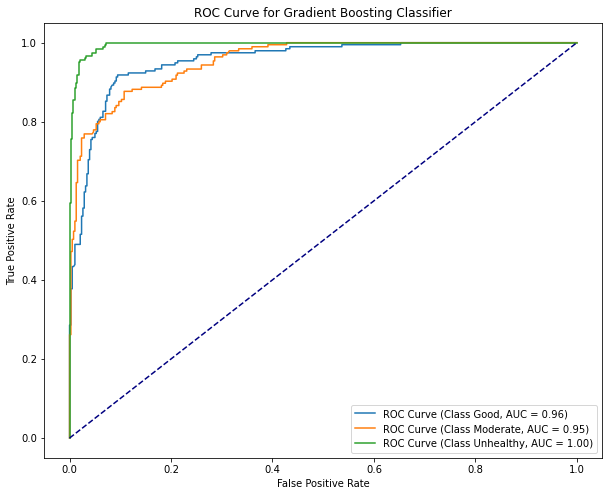


Ratio 40:60
Accuracy: 0.8813559322033898
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       258
           1       0.88      0.81      0.84       255
           2       0.92      0.98      0.95       254

    accuracy                           0.88       767
   macro avg       0.88      0.88      0.88       767
weighted avg       0.88      0.88      0.88       767



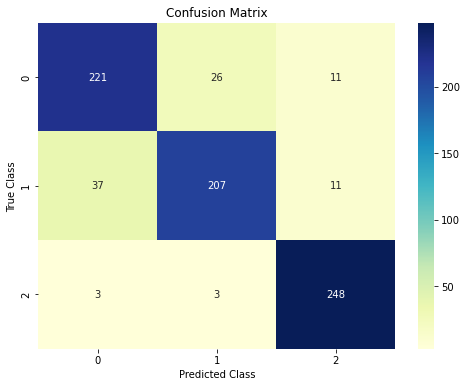

AUC Class Good: 0.96
AUC Class Moderate: 0.96
AUC Class Unhealthy: 0.99
Log Loss: 0.3180


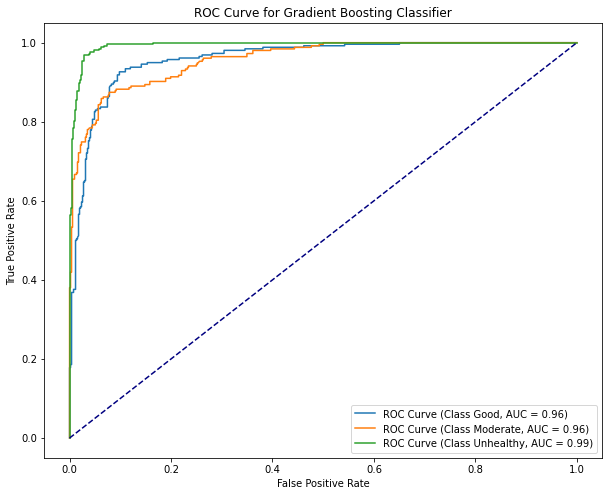

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
    # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=ratio, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Membuat model Gradient Boosting
    gb_classifier = GradientBoostingClassifier(random_state=42)

    # Melatih model
    gb_classifier.fit(X_train, y_train_encoded)

    # Melakukan prediksi pada data testing
    y_pred = gb_classifier.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    report = classification_report(y_test_encoded, y_pred)
    confusion_mat = confusion_matrix(y_test_encoded, y_pred)

    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    # Memvisualisasikan Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = gb_classifier.predict_proba(X_test)

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i in range(gb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i in range(gb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Gradient Boosting Classifier')
    plt.legend()
    
    # Menghitung log loss
    logloss = log_loss(y_test_encoded, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()


## CatBoosting SMOTE


Ratio 20:80
Accuracy: 0.9348958333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       121
           1       0.95      0.90      0.92       135
           2       0.96      0.99      0.98       128

    accuracy                           0.93       384
   macro avg       0.93      0.94      0.93       384
weighted avg       0.94      0.93      0.93       384

AUC Class 0: 0.98
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.1874


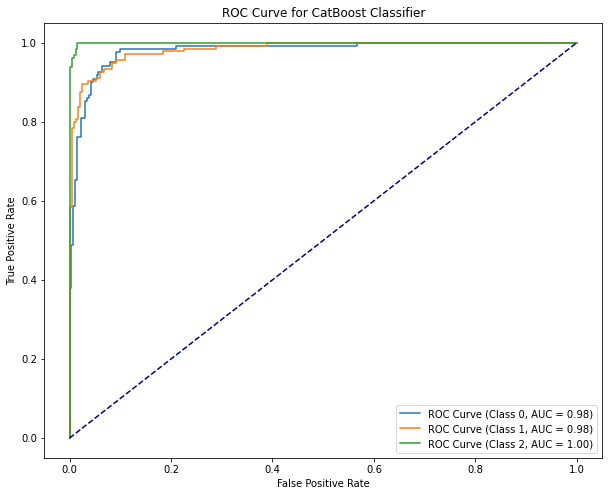


Ratio 30:70
Accuracy: 0.9079861111111112
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       196
           1       0.92      0.84      0.87       195
           2       0.94      0.99      0.97       185

    accuracy                           0.91       576
   macro avg       0.91      0.91      0.91       576
weighted avg       0.91      0.91      0.91       576

AUC Class 0: 0.98
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.2214


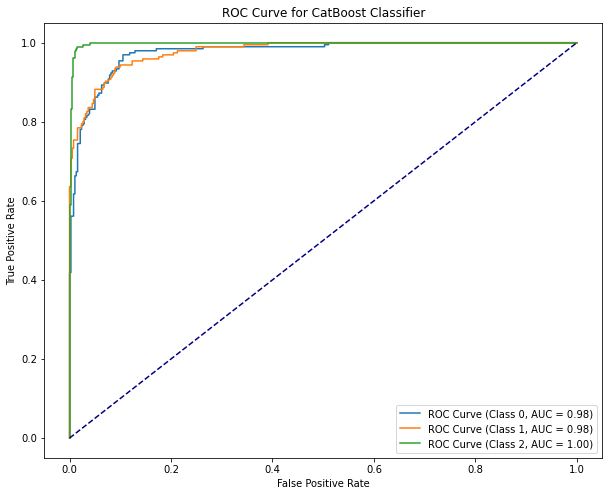


Ratio 40:60
Accuracy: 0.9165580182529335
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       258
           1       0.93      0.84      0.88       255
           2       0.95      1.00      0.97       254

    accuracy                           0.92       767
   macro avg       0.92      0.92      0.92       767
weighted avg       0.92      0.92      0.92       767

AUC Class 0: 0.98
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.2069


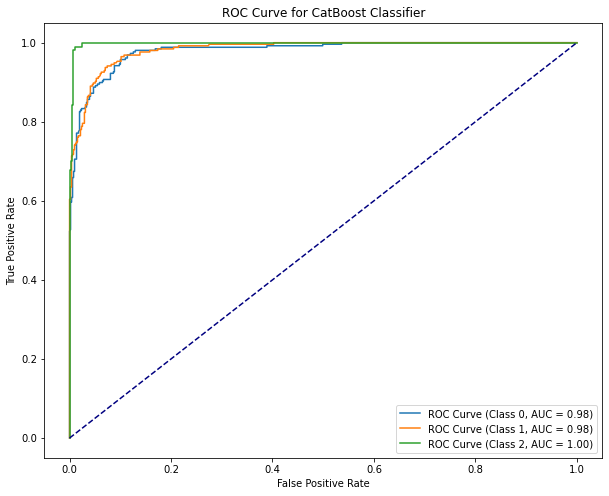

In [22]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Splitting data
X = df.drop(["Category", "Date", "Critical Component"], axis=1)
y = df["Category"]

# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
     # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=ratio, random_state=42)
    
    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    
    # Membuat model CatBoost
    catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

    # Melatih model
    catboost_classifier.fit(X_train, y_train_encoded)

    # Melakukan prediksi pada data testing
    y_pred = catboost_classifier.predict(X_test)

    # Mengukur akurasi model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)

    # Menampilkan classification report
    report = classification_report(y_test_encoded, y_pred)
    print("Classification Report:\n", report)

    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = catboost_classifier.predict_proba(X_test)

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i, class_label in enumerate(catboost_classifier.classes_):
        fpr, tpr, _ = roc_curve((y_test_encoded == class_label).astype(int), y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {class_label}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i, class_label in enumerate(catboost_classifier.classes_):
        fpr, tpr, _ = roc_curve((y_test_encoded == class_label).astype(int), y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {class_label}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for CatBoost Classifier')
    plt.legend()

    # Menghitung log loss
    logloss = log_loss(y_test_encoded, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()


In [29]:
import pickle
# Menyimpan model ke dalam file pkl
with open('catboost_model.pkl', 'wb') as model_file:
    pickle.dump(catboost_classifier, model_file)

# Implementasi SMOTE pada Model Boosting dengan Kfold 5, 10

## XGBOOST FOLD 5 dan 10 SMOTE

KFold=5

Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       121
           1       0.92      0.88      0.90       135
           2       0.96      0.98      0.97       128

    accuracy                           0.92       384
   macro avg       0.92      0.92      0.92       384
weighted avg       0.92      0.92      0.92       384



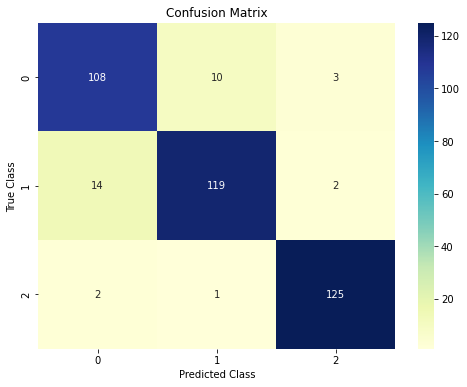

AUC Class Good: 0.98
AUC Class Moderate: 0.98
AUC Class Unhealthy: 1.00
Log Loss: 0.2382


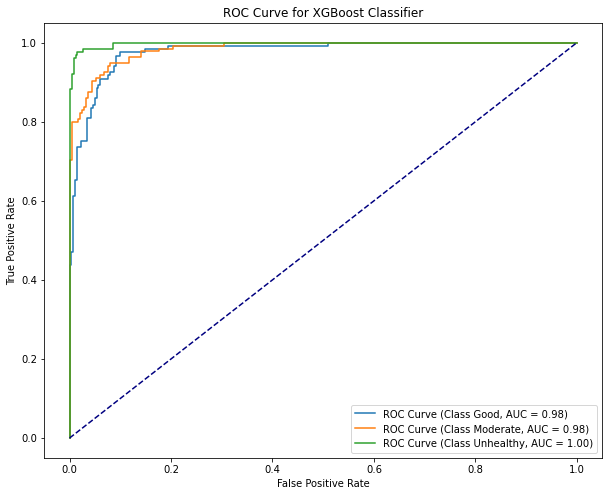


Accuracy: 0.9010416666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88       138
           1       0.86      0.89      0.88       120
           2       0.92      0.98      0.95       126

    accuracy                           0.90       384
   macro avg       0.90      0.90      0.90       384
weighted avg       0.90      0.90      0.90       384



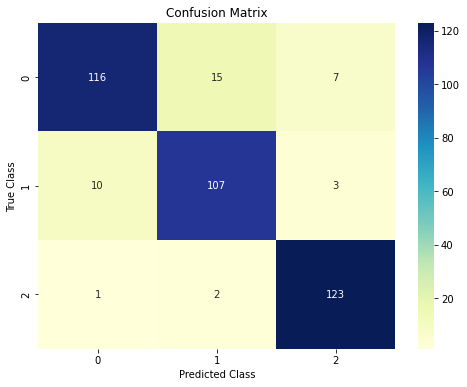

AUC Class Good: 0.97
AUC Class Moderate: 0.98
AUC Class Unhealthy: 0.99
Log Loss: 0.2943


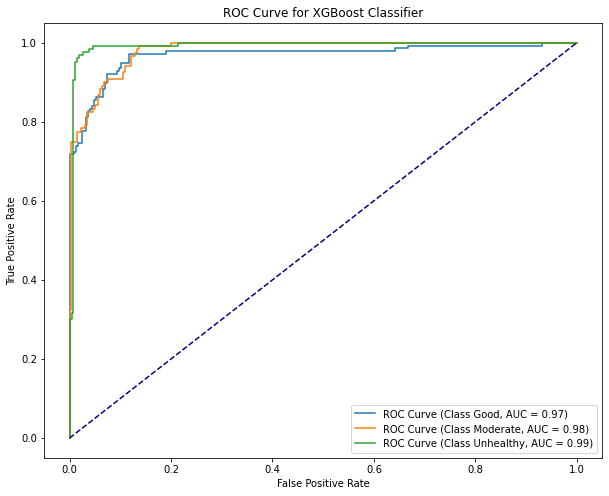


Accuracy: 0.9242819843342036
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       124
           1       0.90      0.89      0.89       128
           2       0.95      0.98      0.97       131

    accuracy                           0.92       383
   macro avg       0.92      0.92      0.92       383
weighted avg       0.92      0.92      0.92       383



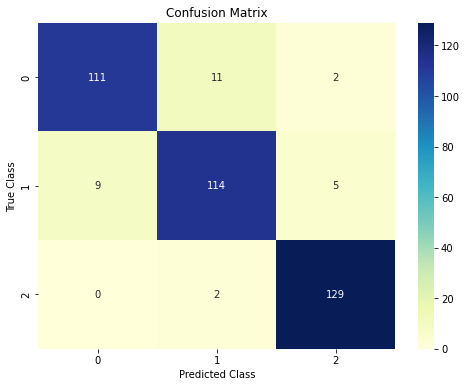

AUC Class Good: 0.99
AUC Class Moderate: 0.97
AUC Class Unhealthy: 0.99
Log Loss: 0.2352


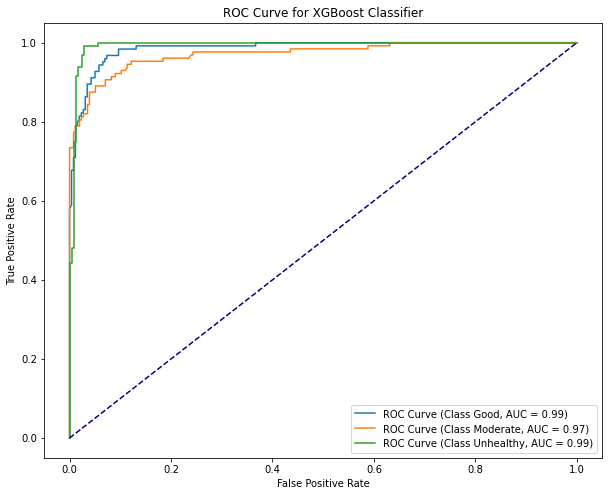


Accuracy: 0.9216710182767625
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       134
           1       0.93      0.86      0.89       139
           2       0.92      1.00      0.96       110

    accuracy                           0.92       383
   macro avg       0.92      0.93      0.92       383
weighted avg       0.92      0.92      0.92       383



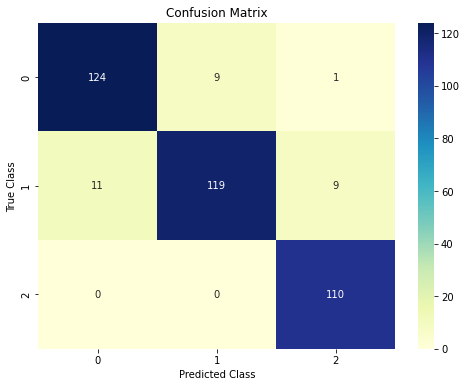

AUC Class Good: 0.98
AUC Class Moderate: 0.97
AUC Class Unhealthy: 1.00
Log Loss: 0.2344


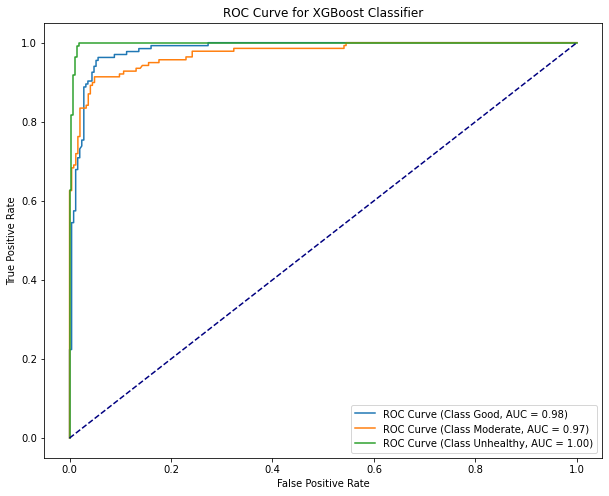


Accuracy: 0.9216710182767625
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       122
           1       0.92      0.85      0.88       117
           2       0.96      0.99      0.97       144

    accuracy                           0.92       383
   macro avg       0.92      0.92      0.92       383
weighted avg       0.92      0.92      0.92       383



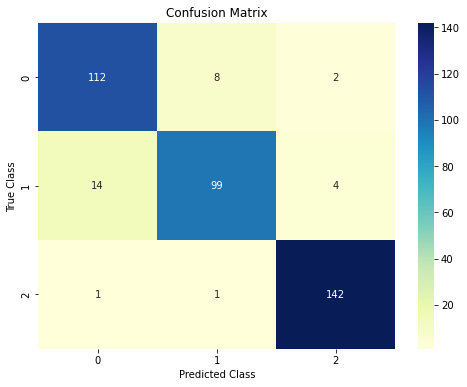

AUC Class Good: 0.98
AUC Class Moderate: 0.97
AUC Class Unhealthy: 1.00
Log Loss: 0.2364


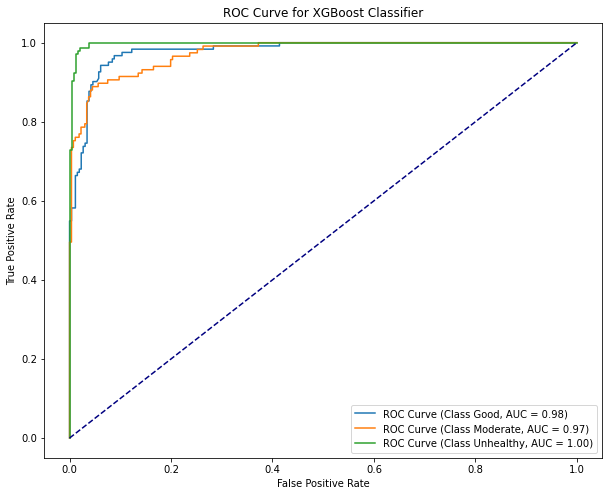


Average Accuracy for 5-fold: 0.9170664708442123
Average AUC for 5-fold: 0.9836547257592929
Average Log Loss for 5-fold: 0.24771575572288965
--------------------------------------------------


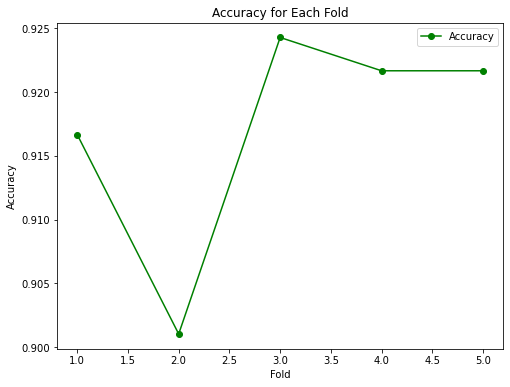

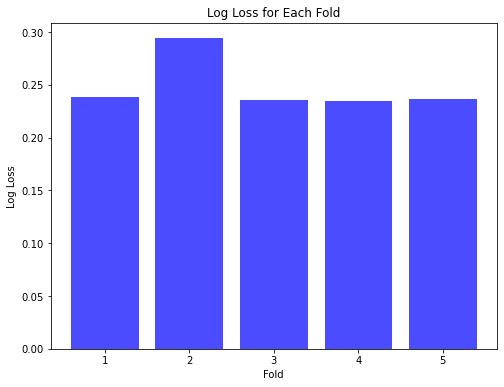


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.916667  0.986302  0.238215
1     2  0.901042  0.980105  0.294280
2     3  0.924282  0.983762  0.235246
3     4  0.921671  0.984391  0.234435
4     5  0.921671  0.983714  0.236402
--------------------------------------------------
KFold=10

Accuracy: 0.9322916666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91        67
           1       0.95      0.90      0.93        69
           2       0.96      0.96      0.96        56

    accuracy                           0.93       192
   macro avg       0.94      0.93      0.93       192
weighted avg       0.93      0.93      0.93       192



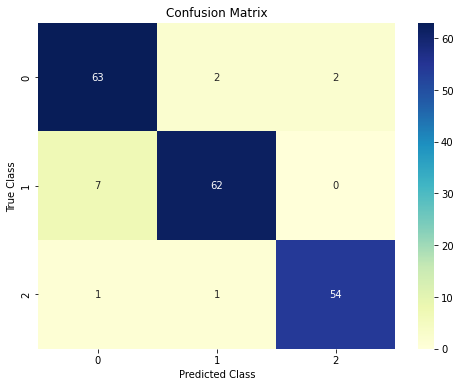

AUC Class Good: 0.98
AUC Class Moderate: 0.99
AUC Class Unhealthy: 1.00
Log Loss: 0.2101


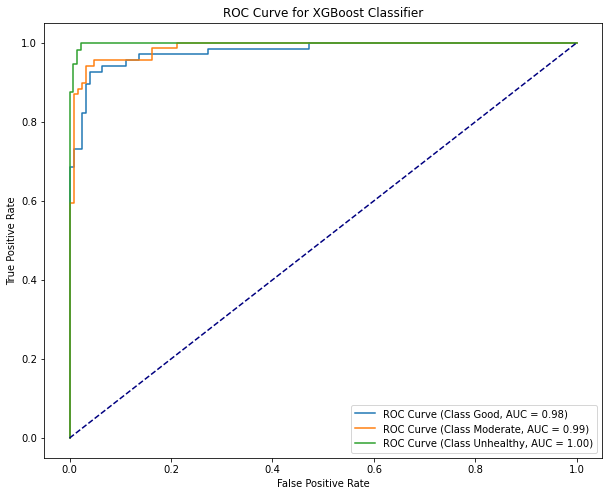


Accuracy: 0.8854166666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        54
           1       0.87      0.83      0.85        66
           2       0.92      0.99      0.95        72

    accuracy                           0.89       192
   macro avg       0.88      0.88      0.88       192
weighted avg       0.88      0.89      0.88       192



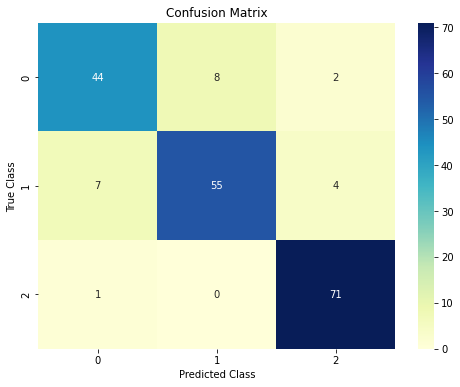

AUC Class Good: 0.98
AUC Class Moderate: 0.98
AUC Class Unhealthy: 1.00
Log Loss: 0.2127


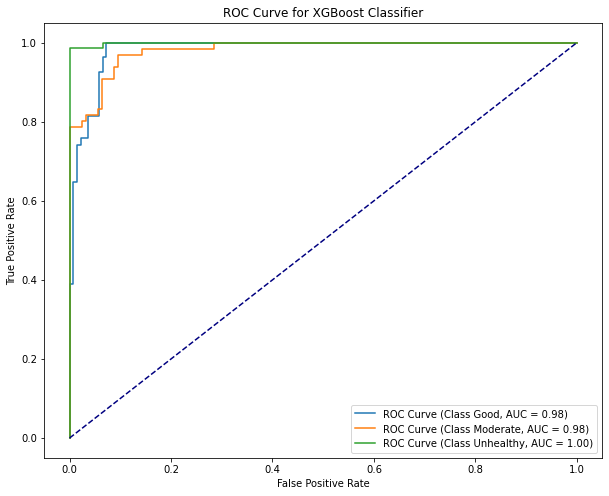


Accuracy: 0.9010416666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89        75
           1       0.85      0.87      0.86        60
           2       0.93      0.98      0.96        57

    accuracy                           0.90       192
   macro avg       0.90      0.91      0.90       192
weighted avg       0.90      0.90      0.90       192



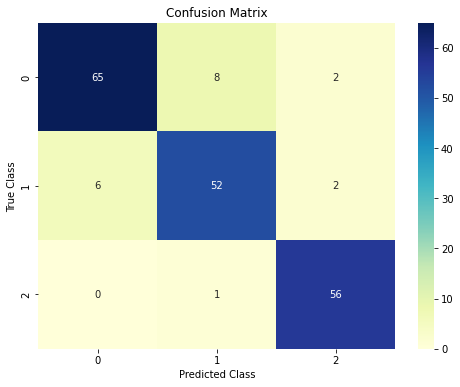

AUC Class Good: 0.97
AUC Class Moderate: 0.98
AUC Class Unhealthy: 0.99
Log Loss: 0.2567


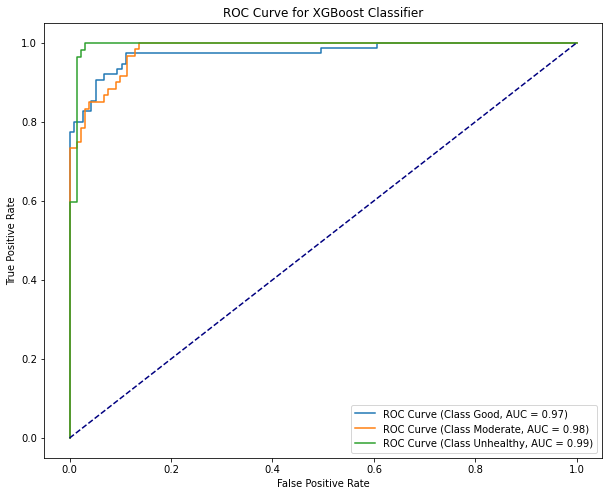


Accuracy: 0.9114583333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        63
           1       0.89      0.90      0.89        60
           2       0.94      0.97      0.96        69

    accuracy                           0.91       192
   macro avg       0.91      0.91      0.91       192
weighted avg       0.91      0.91      0.91       192



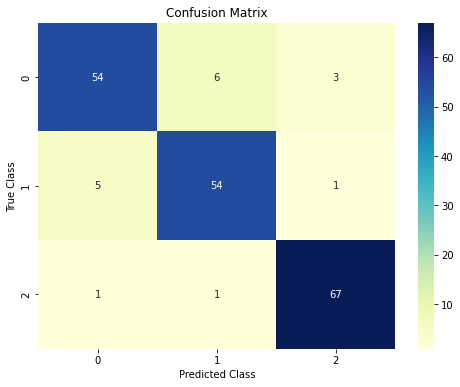

AUC Class Good: 0.98
AUC Class Moderate: 0.99
AUC Class Unhealthy: 1.00
Log Loss: 0.2217


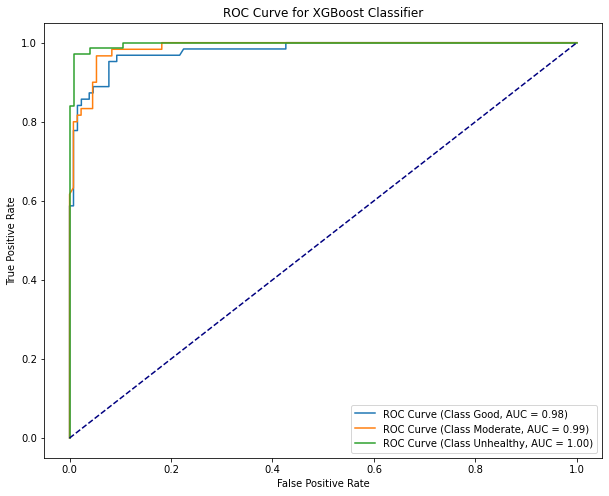


Accuracy: 0.9322916666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91        56
           1       0.91      0.92      0.92        66
           2       0.93      1.00      0.97        70

    accuracy                           0.93       192
   macro avg       0.93      0.93      0.93       192
weighted avg       0.93      0.93      0.93       192



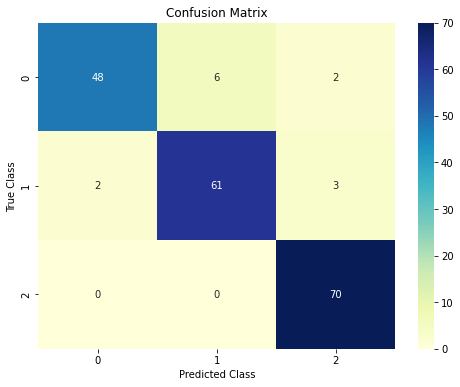

AUC Class Good: 0.99
AUC Class Moderate: 0.97
AUC Class Unhealthy: 0.99
Log Loss: 0.2257


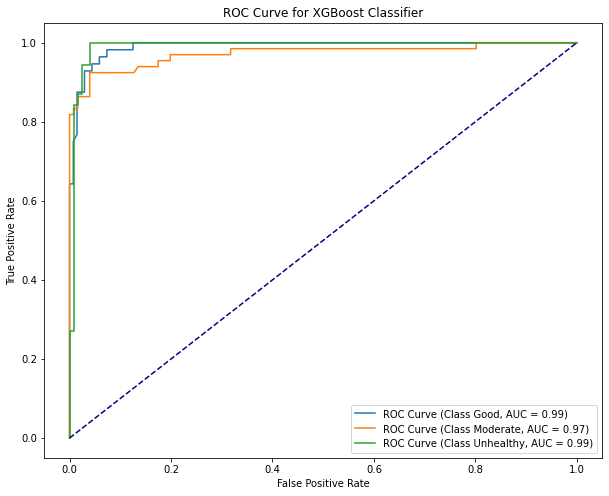


Accuracy: 0.9270833333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91        69
           1       0.89      0.89      0.89        62
           2       0.98      1.00      0.99        61

    accuracy                           0.93       192
   macro avg       0.93      0.93      0.93       192
weighted avg       0.93      0.93      0.93       192



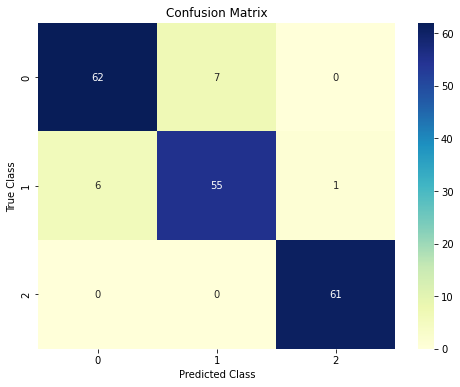

AUC Class Good: 0.98
AUC Class Moderate: 0.97
AUC Class Unhealthy: 1.00
Log Loss: 0.2385


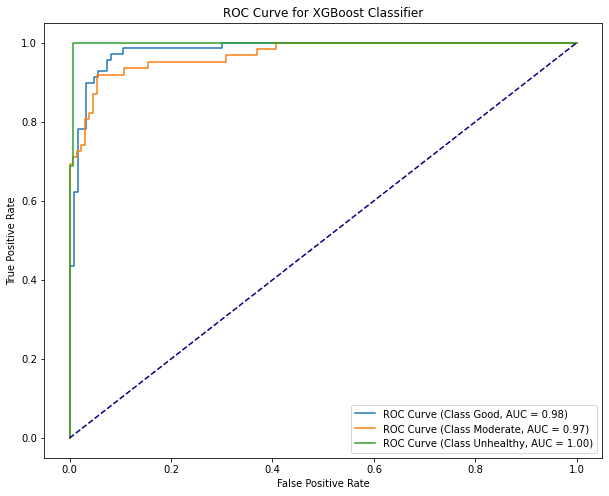


Accuracy: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        69
           1       0.94      0.88      0.91        67
           2       0.93      1.00      0.97        56

    accuracy                           0.94       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.94      0.94      0.94       192



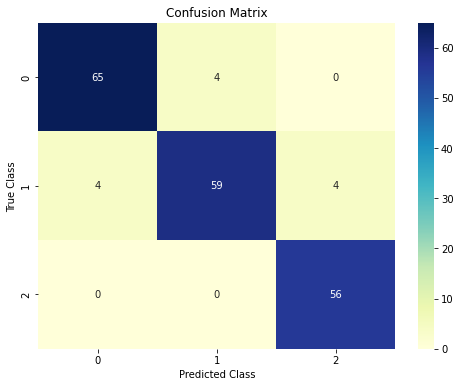

AUC Class Good: 0.99
AUC Class Moderate: 0.98
AUC Class Unhealthy: 1.00
Log Loss: 0.1872


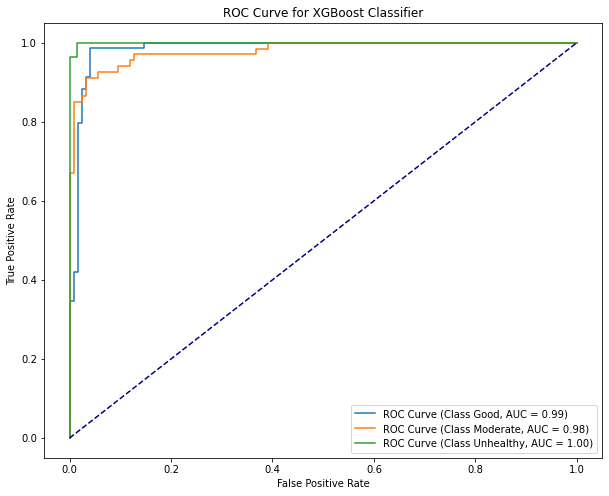


Accuracy: 0.9319371727748691
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        64
           1       0.94      0.88      0.91        72
           2       0.95      1.00      0.97        55

    accuracy                           0.93       191
   macro avg       0.93      0.94      0.93       191
weighted avg       0.93      0.93      0.93       191



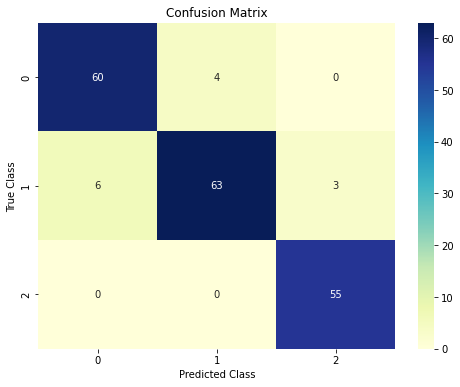

AUC Class Good: 0.98
AUC Class Moderate: 0.98
AUC Class Unhealthy: 1.00
Log Loss: 0.2164


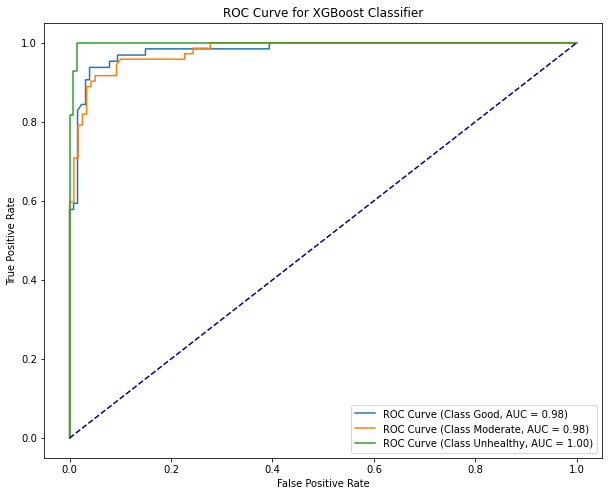


Accuracy: 0.9424083769633508
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        58
           1       0.88      0.90      0.89        49
           2       0.99      0.99      0.99        84

    accuracy                           0.94       191
   macro avg       0.93      0.93      0.93       191
weighted avg       0.94      0.94      0.94       191



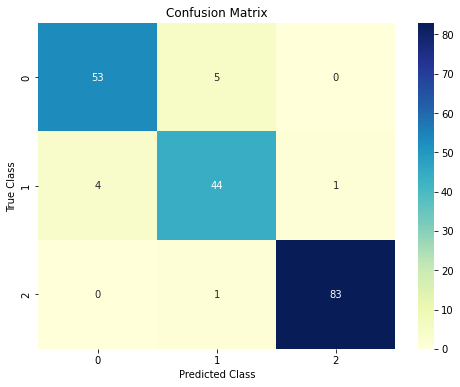

AUC Class Good: 0.99
AUC Class Moderate: 0.97
AUC Class Unhealthy: 0.99
Log Loss: 0.1976


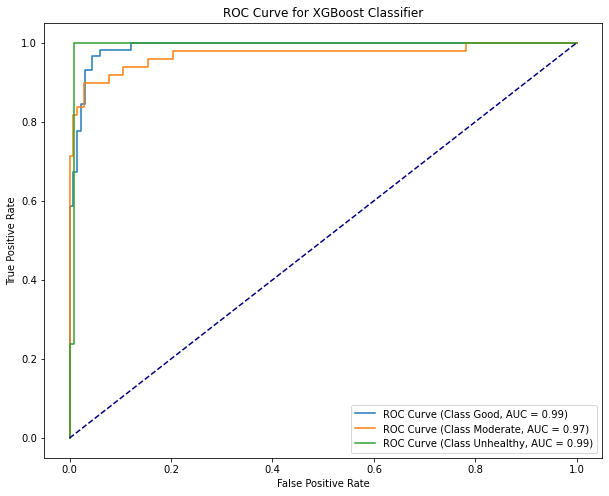


Accuracy: 0.900523560209424
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        64
           1       0.92      0.81      0.86        68
           2       0.94      1.00      0.97        59

    accuracy                           0.90       191
   macro avg       0.90      0.91      0.90       191
weighted avg       0.90      0.90      0.90       191



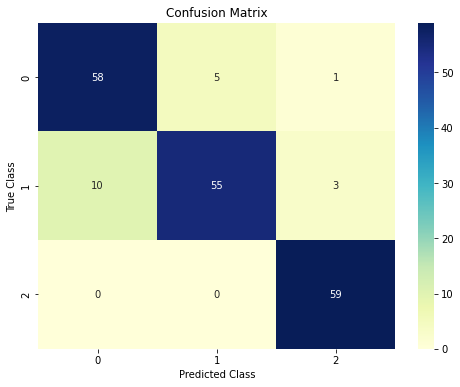

AUC Class Good: 0.97
AUC Class Moderate: 0.97
AUC Class Unhealthy: 1.00
Log Loss: 0.2792


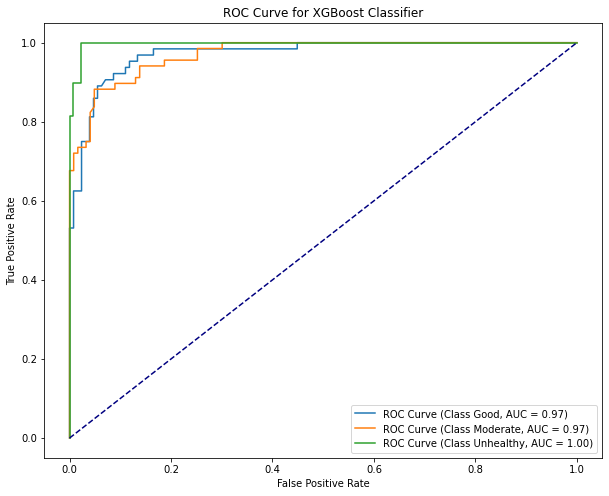


Average Accuracy for 10-fold: 0.9201952443280976
Average AUC for 10-fold: 0.9852455103839312
Average Log Loss for 10-fold: 0.2245885312501966
--------------------------------------------------


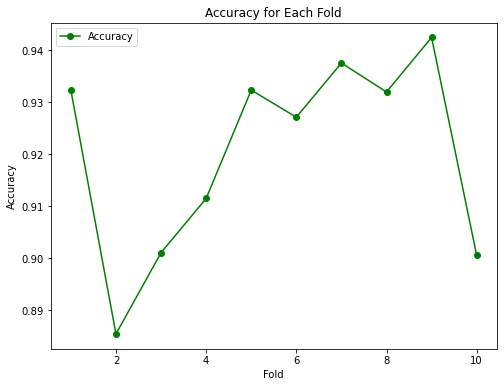

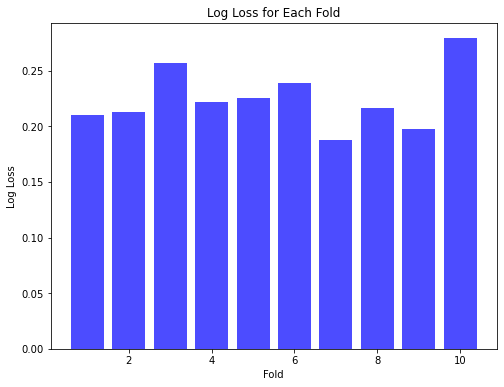


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.932292  0.987993  0.210132
1     2  0.885417  0.987793  0.212735
2     3  0.901042  0.982945  0.256693
3     4  0.911458  0.987673  0.221732
4     5  0.932292  0.984544  0.225732
5     6  0.927083  0.983035  0.238465
6     7  0.937500  0.988030  0.187223
7     8  0.931937  0.986221  0.216396
8     9  0.942408  0.984037  0.197619
9    10  0.900524  0.980183  0.279157
--------------------------------------------------


In [23]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# List of KFolds
kfolds = [5, 10]

for kfold in kfolds:
    print(f"KFold={kfold}")
    kfold_cv = KFold(n_splits=kfold, shuffle=True, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_resampled)

    fold_accuracies = []
    fold_auc_scores = []
    fold_log_losses = []

    for train_index, val_index in kfold_cv.split(X_resampled):
        X_train_kfold, X_val_kfold = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
        y_train_kfold, y_val_kfold = y_encoded[train_index], y_encoded[val_index]

        # Membuat model XGBoost
        xgb_classifier = XGBClassifier(random_state=42)

        # Melatih model
        xgb_classifier.fit(X_train_kfold, y_train_kfold)

        # Melakukan prediksi pada data validasi
        y_pred = xgb_classifier.predict(X_val_kfold)

        # Evaluasi model
        accuracy = accuracy_score(y_val_kfold, y_pred)
        report = classification_report(y_val_kfold, y_pred)
        confusion_mat = confusion_matrix(y_val_kfold, y_pred)

        print("\nAccuracy:", accuracy)
        print("Classification Report:\n", report)

        # Visualisasi Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted Class")
        plt.ylabel("True Class")
        plt.show()

        # Menghitung probabilitas prediksi untuk setiap kelas
        y_probabilities = xgb_classifier.predict_proba(X_val_kfold)

        # Menghitung nilai AUC untuk setiap kelas
        auc_scores = []
        for i in range(xgb_classifier.n_classes_):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            auc_scores.append(roc_auc)
            print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

        # Menghitung log loss
        logloss = log_loss(y_val_kfold, y_probabilities)
        fold_log_losses.append(logloss)
        print(f'Log Loss: {logloss:.4f}')

        fold_accuracies.append(accuracy)
        fold_auc_scores.append(np.mean(auc_scores))

        # Menampilkan kurva ROC untuk setiap kelas
        plt.figure(figsize=(10, 8))
        for i in range(xgb_classifier.n_classes_):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for XGBoost Classifier')
        plt.legend()

        plt.show()

    # Menampilkan rata-rata akurasi, AUC, dan log loss untuk fold tersebut
    print(f"\nAverage Accuracy for {kfold}-fold:", np.mean(fold_accuracies))
    print(f"Average AUC for {kfold}-fold:", np.mean(fold_auc_scores))
    print(f"Average Log Loss for {kfold}-fold:", np.mean(fold_log_losses))
    print("--------------------------------------------------")
    
    # Visualisasi Akurasi untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, kfold + 1), fold_accuracies, marker='o', linestyle='-', color='green', label='Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Each Fold')
    plt.legend()
    plt.show()

    # Visualisasi Log Loss untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, kfold + 1), fold_log_losses, color='blue', alpha=0.7)
    plt.xlabel('Fold')
    plt.ylabel('Log Loss')
    plt.title('Log Loss for Each Fold')
    plt.show()
    
    # Menampilkan summary untuk setiap fold
    fold_summary = pd.DataFrame({
        'Fold': np.arange(1, kfold + 1),
        'Accuracy': fold_accuracies,
        'AUC': fold_auc_scores,
        'Log Loss': fold_log_losses
    })
    print("\nFold Summary:")
    print(fold_summary)
    print("--------------------------------------------------")


## AdaBoost FOLD 5 dan 10 SMOTE

KFold=5

Accuracy: 0.6432291666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.78      0.61       121
           1       0.57      0.23      0.33       135
           2       0.85      0.95      0.90       128

    accuracy                           0.64       384
   macro avg       0.64      0.65      0.61       384
weighted avg       0.64      0.64      0.61       384



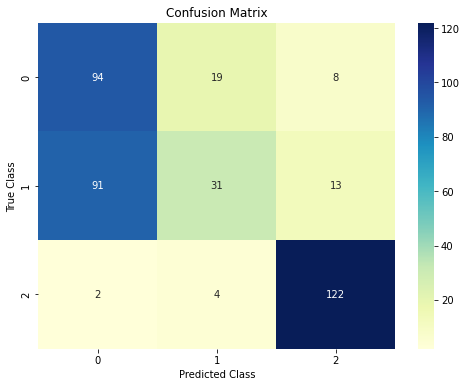

AUC Class Good: 0.74
AUC Class Moderate: 0.77
AUC Class Unhealthy: 0.97
Log Loss: 0.9135


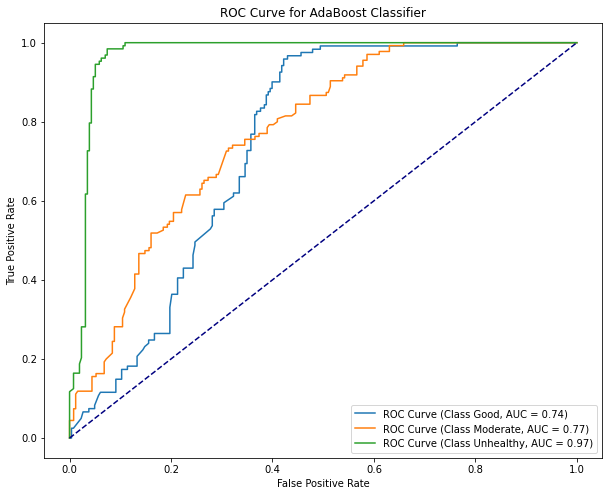


Accuracy: 0.6510416666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.82      0.68       138
           1       0.44      0.23      0.30       120
           2       0.87      0.87      0.87       126

    accuracy                           0.65       384
   macro avg       0.63      0.64      0.61       384
weighted avg       0.63      0.65      0.62       384



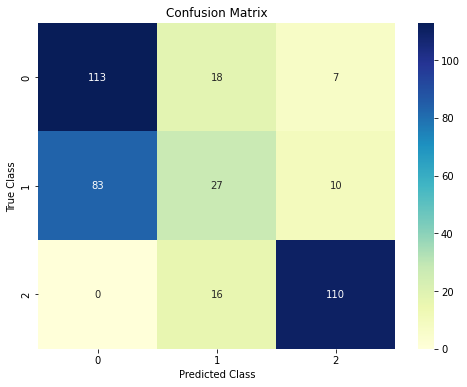

AUC Class Good: 0.77
AUC Class Moderate: 0.68
AUC Class Unhealthy: 0.96
Log Loss: 0.8991


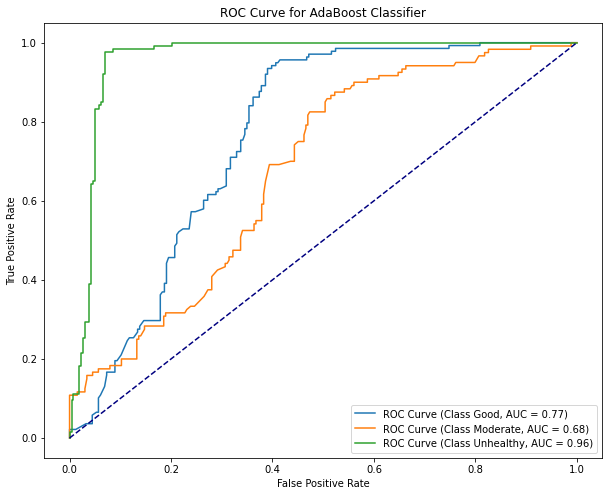


Accuracy: 0.6501305483028721
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.57      0.55       124
           1       0.51      0.42      0.46       128
           2       0.87      0.95      0.91       131

    accuracy                           0.65       383
   macro avg       0.64      0.65      0.64       383
weighted avg       0.64      0.65      0.64       383



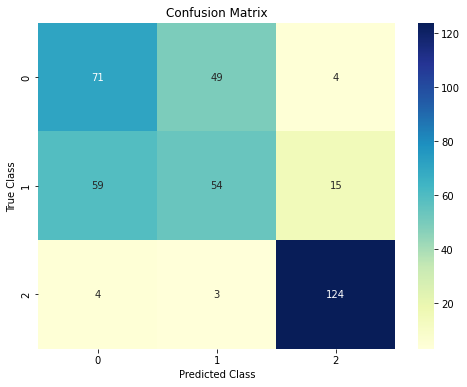

AUC Class Good: 0.75
AUC Class Moderate: 0.74
AUC Class Unhealthy: 0.94
Log Loss: 0.8780


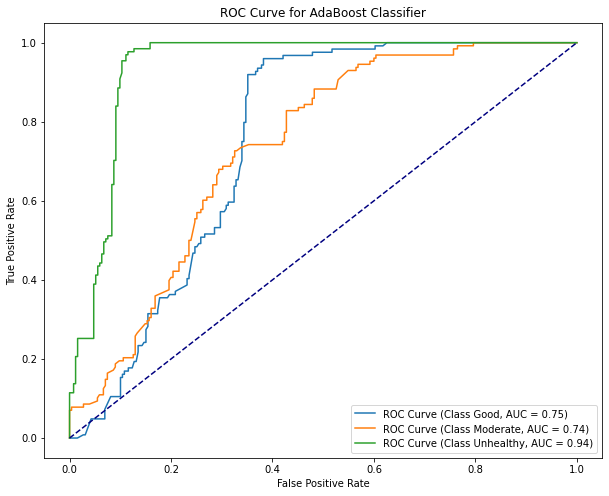


Accuracy: 0.618798955613577
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.49      0.52       134
           1       0.50      0.53      0.51       139
           2       0.84      0.89      0.87       110

    accuracy                           0.62       383
   macro avg       0.63      0.64      0.63       383
weighted avg       0.61      0.62      0.62       383



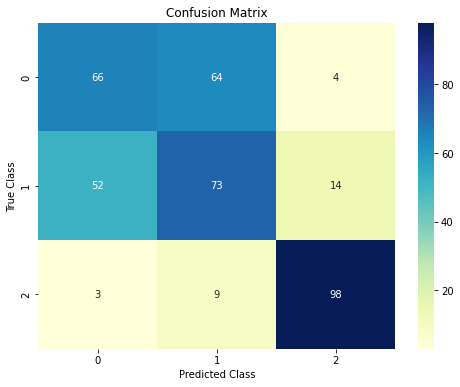

AUC Class Good: 0.69
AUC Class Moderate: 0.70
AUC Class Unhealthy: 0.96
Log Loss: 0.9162


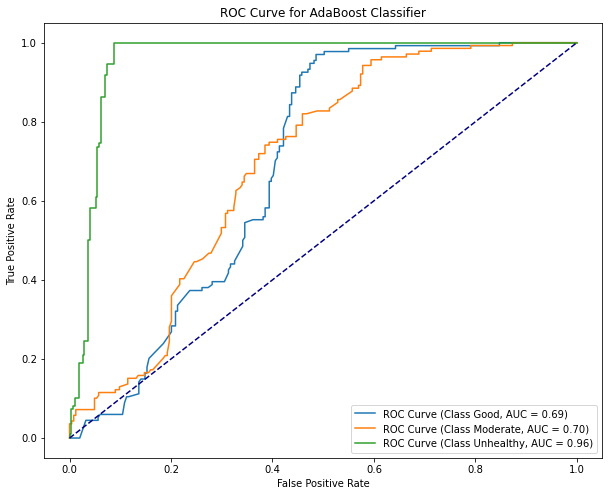


Accuracy: 0.6997389033942559
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.52      0.56       122
           1       0.55      0.56      0.55       117
           2       0.87      0.97      0.92       144

    accuracy                           0.70       383
   macro avg       0.68      0.68      0.68       383
weighted avg       0.69      0.70      0.69       383



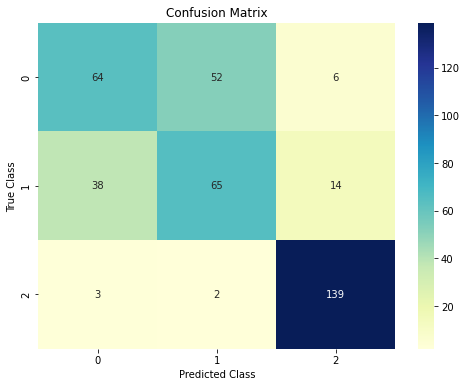

AUC Class Good: 0.77
AUC Class Moderate: 0.80
AUC Class Unhealthy: 0.95
Log Loss: 0.9156


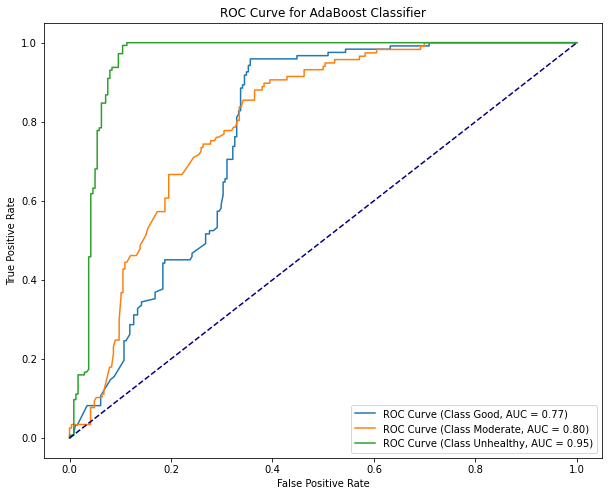


Average Accuracy for 5-fold: 0.6525878481288077
Average AUC for 5-fold: 0.812427134997985
Average Log Loss for 5-fold: 0.9044636004502886
--------------------------------------------------


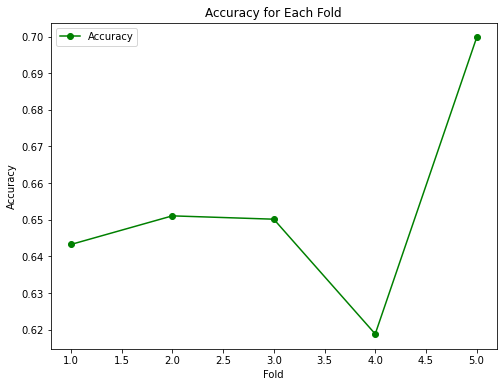

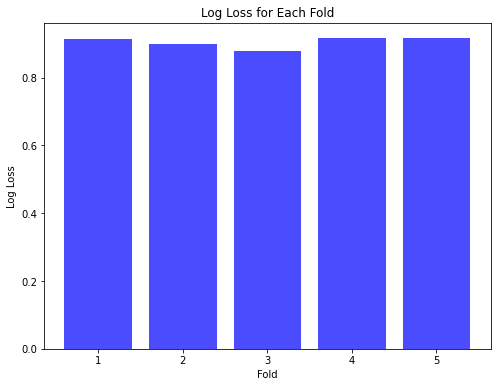


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.643229  0.828737  0.913487
1     2  0.651042  0.800522  0.899099
2     3  0.650131  0.808442  0.877960
3     4  0.618799  0.781539  0.916206
4     5  0.699739  0.842896  0.915566
--------------------------------------------------
KFold=10

Accuracy: 0.6458333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.70      0.60        67
           1       0.53      0.33      0.41        69
           2       0.92      0.96      0.94        56

    accuracy                           0.65       192
   macro avg       0.66      0.67      0.65       192
weighted avg       0.64      0.65      0.63       192



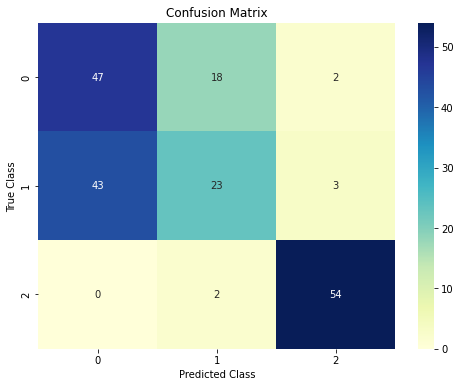

AUC Class Good: 0.73
AUC Class Moderate: 0.72
AUC Class Unhealthy: 0.99
Log Loss: 0.8486


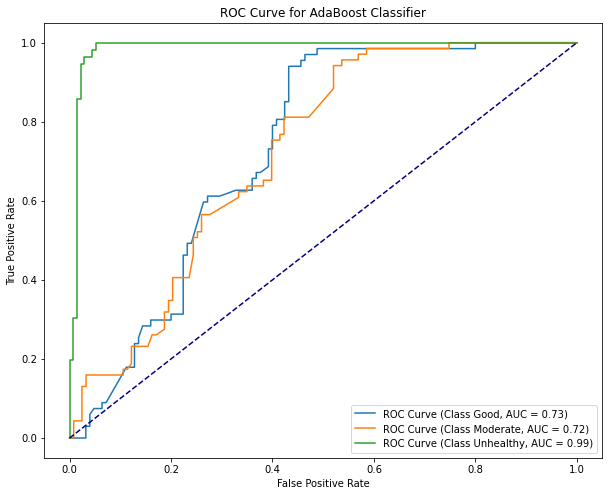


Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.83      0.64        54
           1       0.58      0.23      0.33        66
           2       0.86      0.94      0.90        72

    accuracy                           0.67       192
   macro avg       0.65      0.67      0.62       192
weighted avg       0.67      0.67      0.63       192



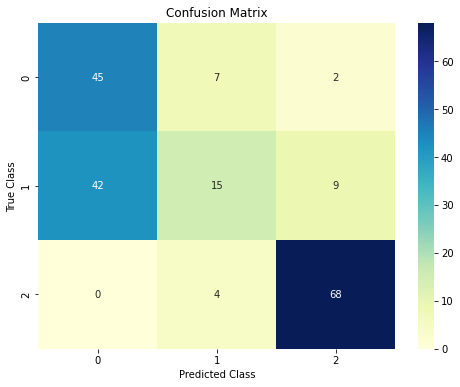

AUC Class Good: 0.75
AUC Class Moderate: 0.80
AUC Class Unhealthy: 0.94
Log Loss: 0.9376


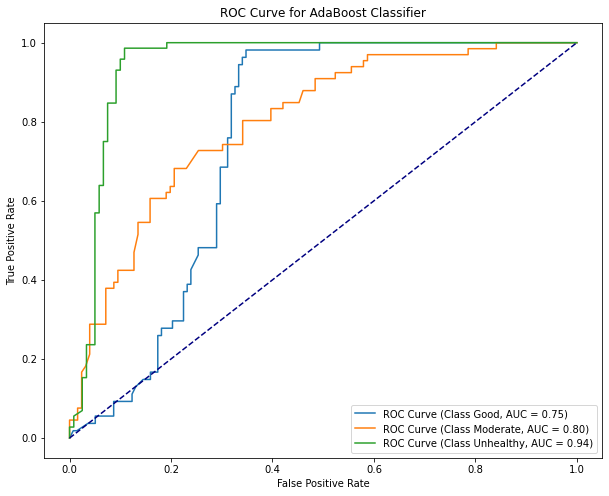


Accuracy: 0.640625
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.56      0.57        75
           1       0.44      0.42      0.43        60
           2       0.89      0.98      0.93        57

    accuracy                           0.64       192
   macro avg       0.64      0.65      0.64       192
weighted avg       0.63      0.64      0.63       192



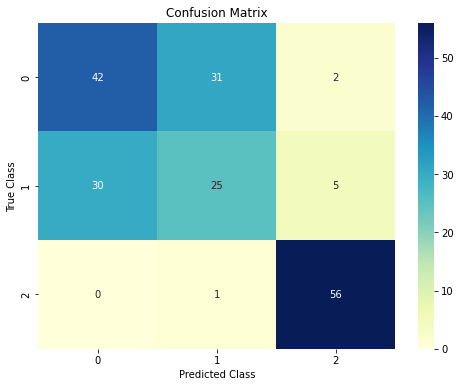

AUC Class Good: 0.75
AUC Class Moderate: 0.71
AUC Class Unhealthy: 0.97
Log Loss: 0.8849


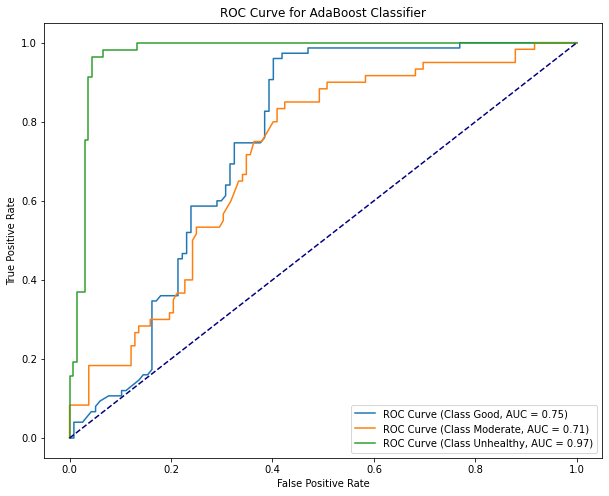


Accuracy: 0.6041666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.60      0.55        63
           1       0.39      0.30      0.34        60
           2       0.85      0.87      0.86        69

    accuracy                           0.60       192
   macro avg       0.58      0.59      0.58       192
weighted avg       0.59      0.60      0.59       192



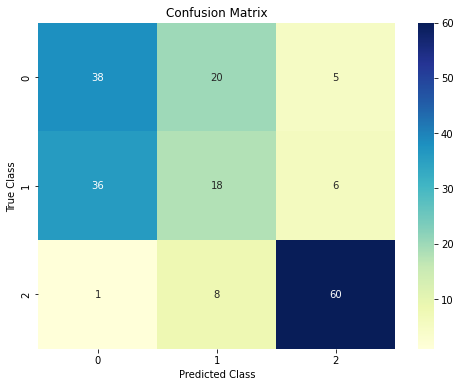

AUC Class Good: 0.73
AUC Class Moderate: 0.76
AUC Class Unhealthy: 0.96
Log Loss: 0.9044


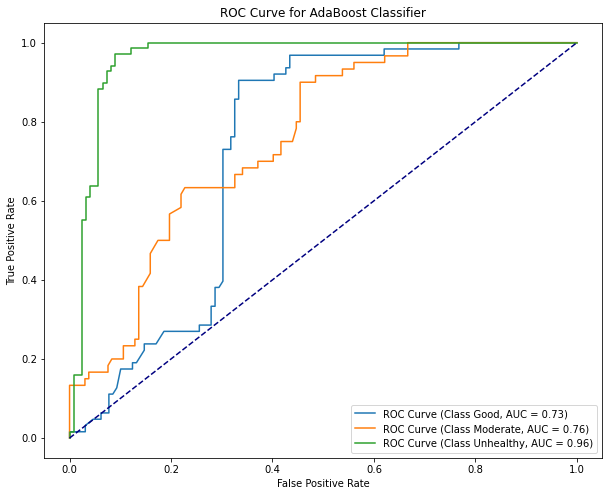


Accuracy: 0.6458333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.48      0.48        56
           1       0.55      0.53      0.54        66
           2       0.86      0.89      0.87        70

    accuracy                           0.65       192
   macro avg       0.63      0.63      0.63       192
weighted avg       0.64      0.65      0.64       192



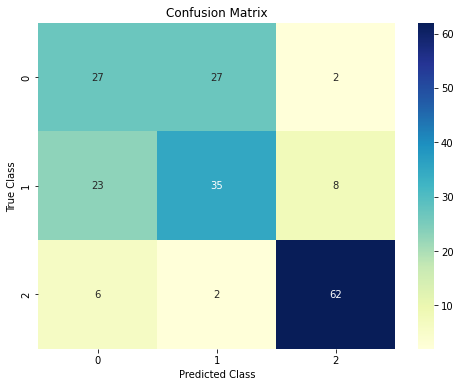

AUC Class Good: 0.75
AUC Class Moderate: 0.73
AUC Class Unhealthy: 0.93
Log Loss: 0.9309


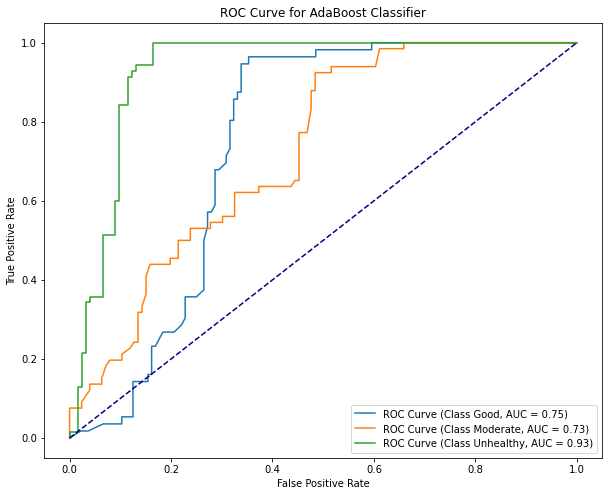


Accuracy: 0.6510416666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.49      0.55        69
           1       0.50      0.50      0.50        62
           2       0.80      0.98      0.88        61

    accuracy                           0.65       192
   macro avg       0.64      0.66      0.64       192
weighted avg       0.64      0.65      0.64       192



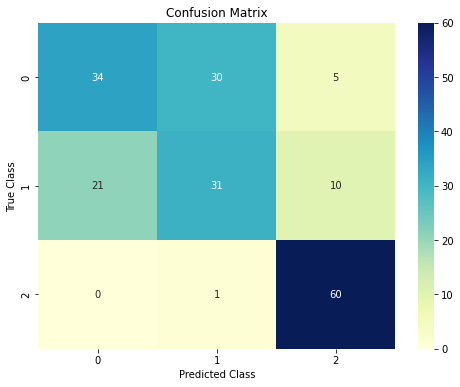

AUC Class Good: 0.77
AUC Class Moderate: 0.76
AUC Class Unhealthy: 0.93
Log Loss: 0.9204


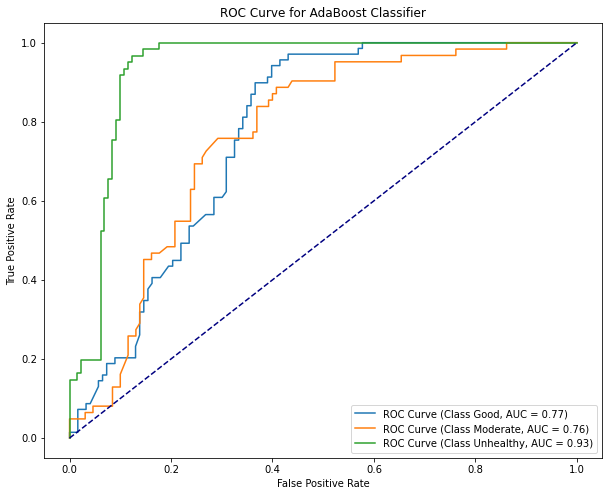


Accuracy: 0.6302083333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.80      0.65        69
           1       0.52      0.19      0.28        67
           2       0.80      0.95      0.87        56

    accuracy                           0.63       192
   macro avg       0.62      0.65      0.60       192
weighted avg       0.61      0.63      0.58       192



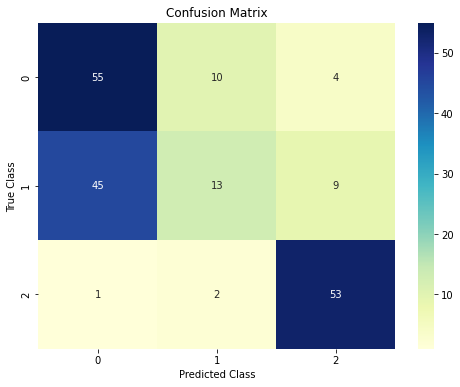

AUC Class Good: 0.69
AUC Class Moderate: 0.77
AUC Class Unhealthy: 0.95
Log Loss: 0.9042


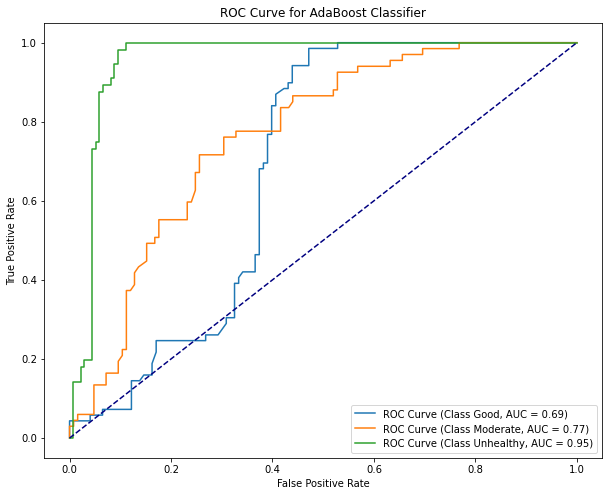


Accuracy: 0.5863874345549738
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.48      0.48        64
           1       0.46      0.42      0.44        72
           2       0.85      0.93      0.89        55

    accuracy                           0.59       191
   macro avg       0.59      0.61      0.60       191
weighted avg       0.58      0.59      0.58       191



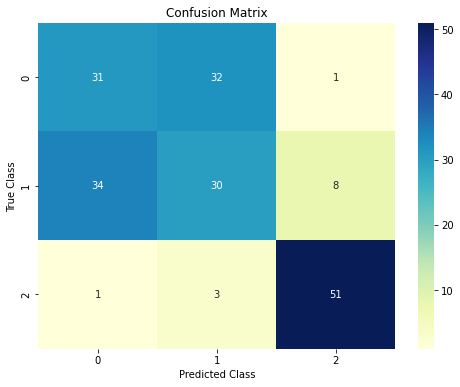

AUC Class Good: 0.68
AUC Class Moderate: 0.68
AUC Class Unhealthy: 0.95
Log Loss: 0.9234


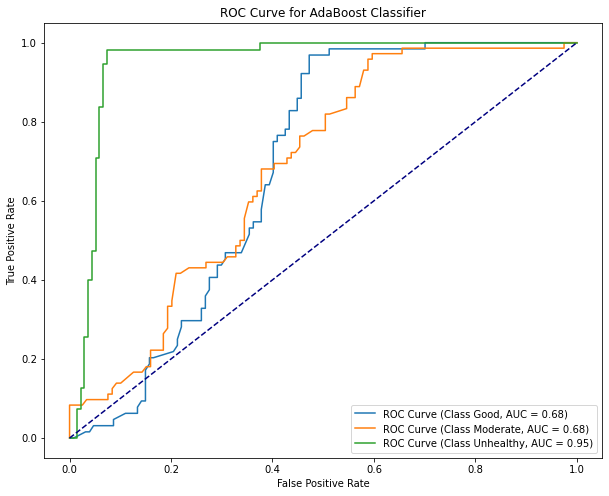


Accuracy: 0.6649214659685864
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.67      0.59        58
           1       0.38      0.29      0.33        49
           2       0.94      0.88      0.91        84

    accuracy                           0.66       191
   macro avg       0.61      0.61      0.61       191
weighted avg       0.67      0.66      0.66       191



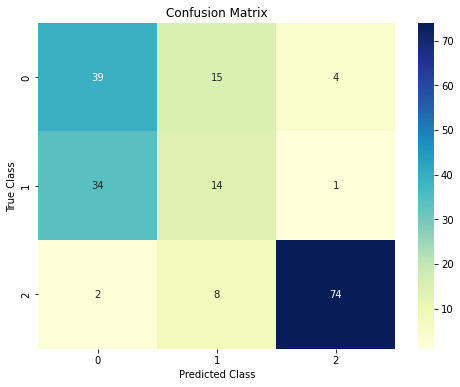

AUC Class Good: 0.78
AUC Class Moderate: 0.81
AUC Class Unhealthy: 0.96
Log Loss: 0.9147


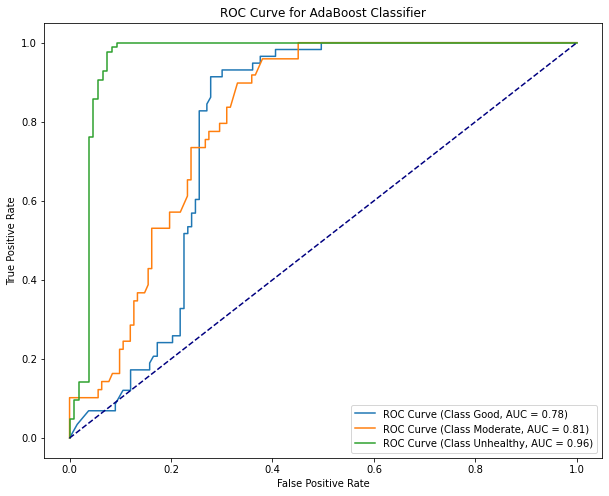


Accuracy: 0.6596858638743456
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.67      0.61        64
           1       0.61      0.40      0.48        68
           2       0.80      0.95      0.87        59

    accuracy                           0.66       191
   macro avg       0.66      0.67      0.65       191
weighted avg       0.65      0.66      0.64       191



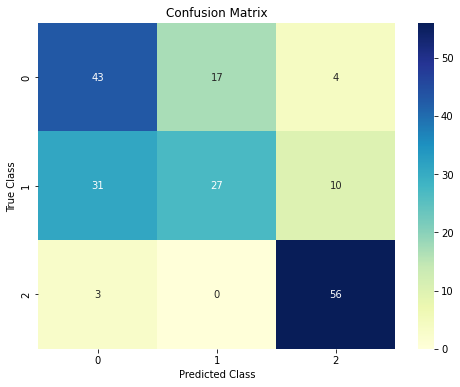

AUC Class Good: 0.77
AUC Class Moderate: 0.75
AUC Class Unhealthy: 0.96
Log Loss: 0.9055


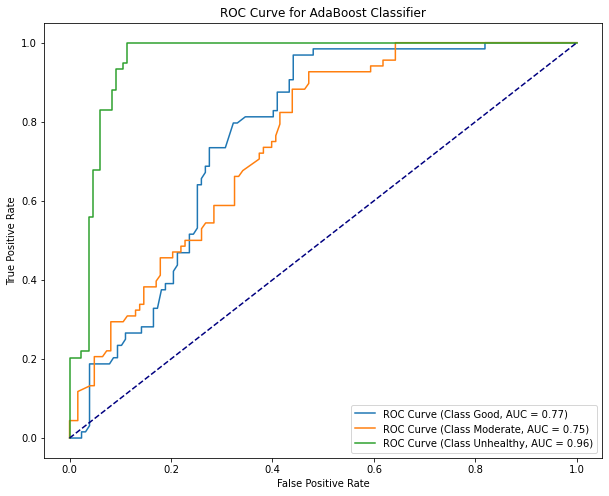


Average Accuracy for 10-fold: 0.6395369764397906
Average AUC for 10-fold: 0.8147444566144877
Average Log Loss for 10-fold: 0.9074666397042644
--------------------------------------------------


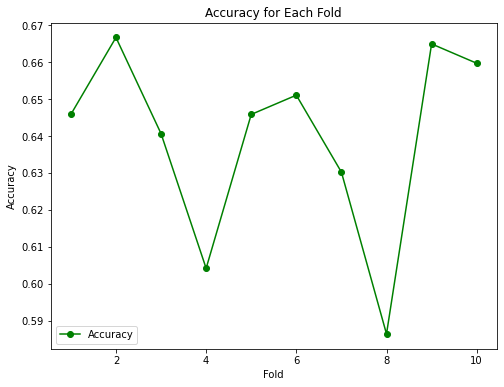

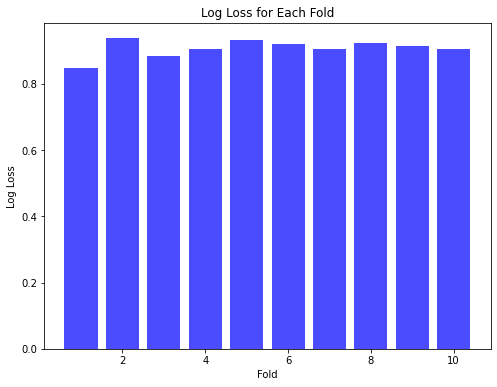


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.645833  0.813664  0.848560
1     2  0.666667  0.832155  0.937629
2     3  0.640625  0.812409  0.884854
3     4  0.604167  0.816310  0.904441
4     5  0.645833  0.800264  0.930886
5     6  0.651042  0.823399  0.920429
6     7  0.630208  0.802690  0.904161
7     8  0.586387  0.771920  0.923439
8     9  0.664921  0.850078  0.914735
9    10  0.659686  0.824556  0.905532
--------------------------------------------------


In [24]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# List of KFolds
kfolds = [5, 10]

for kfold in kfolds:
    print(f"KFold={kfold}")
    kfold_cv = KFold(n_splits=kfold, shuffle=True, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_resampled)

    fold_accuracies = []
    fold_auc_scores = []
    fold_log_losses = []  # Initialize fold_log_losses inside the loop

    for train_index, val_index in kfold_cv.split(X_resampled):
        X_train_kfold, X_val_kfold = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
        y_train_kfold, y_val_kfold = y_encoded[train_index], y_encoded[val_index]

        # Membuat model AdaBoost dengan Decision Tree Classifier sebagai base estimator
        ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

        # Melatih model
        ada_classifier.fit(X_train_kfold, y_train_kfold)

        # Melakukan prediksi pada data validasi
        y_pred = ada_classifier.predict(X_val_kfold)

        # Evaluasi model
        accuracy = accuracy_score(y_val_kfold, y_pred)
        report = classification_report(y_val_kfold, y_pred)
        confusion_mat = confusion_matrix(y_val_kfold, y_pred)

        print("\nAccuracy:", accuracy)
        print("Classification Report:\n", report)

        # Visualisasi Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted Class")
        plt.ylabel("True Class")
        plt.show()

        # Menghitung probabilitas prediksi untuk setiap kelas
        y_probabilities = ada_classifier.predict_proba(X_val_kfold)

        # Menghitung nilai AUC untuk setiap kelas
        auc_scores = []
        for i in range(ada_classifier.n_classes_):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            auc_scores.append(roc_auc)
            print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

        # Menghitung log loss
        logloss = log_loss(y_val_kfold, y_probabilities)
        fold_log_losses.append(logloss)
        print(f'Log Loss: {logloss:.4f}')

        fold_accuracies.append(accuracy)
        fold_auc_scores.append(np.mean(auc_scores))

        # Menampilkan kurva ROC untuk setiap kelas
        plt.figure(figsize=(10, 8))
        for i in range(ada_classifier.n_classes_):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for AdaBoost Classifier')
        plt.legend()

        plt.show()

    # Menampilkan rata-rata akurasi, AUC, dan log loss untuk fold tersebut
    print(f"\nAverage Accuracy for {kfold}-fold:", np.mean(fold_accuracies))
    print(f"Average AUC for {kfold}-fold:", np.mean(fold_auc_scores))
    print(f"Average Log Loss for {kfold}-fold:", np.mean(fold_log_losses))
    print("--------------------------------------------------")

    # Visualisasi Akurasi untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, kfold + 1), fold_accuracies, marker='o', linestyle='-', color='green', label='Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Each Fold')
    plt.legend()
    plt.show()

    # Visualisasi Log Loss untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, kfold + 1), fold_log_losses, color='blue', alpha=0.7)
    plt.xlabel('Fold')
    plt.ylabel('Log Loss')
    plt.title('Log Loss for Each Fold')
    plt.show()

    # Menampilkan summary untuk setiap fold
    fold_summary = pd.DataFrame({
        'Fold': np.arange(1, kfold + 1),
        'Accuracy': fold_accuracies,
        'AUC': fold_auc_scores,
        'Log Loss': fold_log_losses
    })
    print("\nFold Summary:")
    print(fold_summary)
    print("--------------------------------------------------")


## GradientBoostingClasifire FOLD 5 dan 10 SMOTE

KFold=5

Accuracy: 0.7942708333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       121
           1       0.79      0.67      0.72       135
           2       0.87      0.98      0.92       128

    accuracy                           0.79       384
   macro avg       0.79      0.80      0.79       384
weighted avg       0.79      0.79      0.79       384

AUC Class Good: 0.87
AUC Class Moderate: 0.87
AUC Class Unhealthy: 0.99
Log Loss: 0.5526


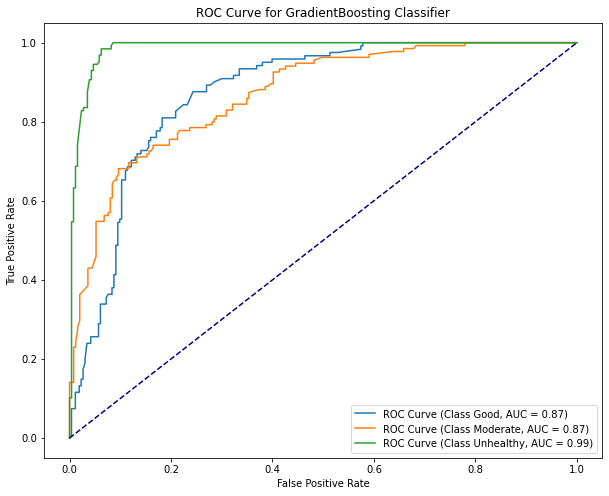


Accuracy: 0.7682291666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71       138
           1       0.68      0.66      0.67       120
           2       0.84      0.99      0.91       126

    accuracy                           0.77       384
   macro avg       0.76      0.77      0.76       384
weighted avg       0.76      0.77      0.76       384

AUC Class Good: 0.88
AUC Class Moderate: 0.84
AUC Class Unhealthy: 0.98
Log Loss: 0.5766


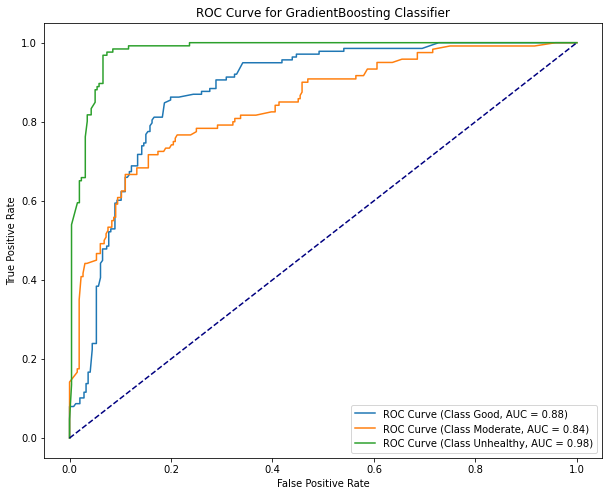


Accuracy: 0.7911227154046997
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       124
           1       0.80      0.55      0.65       128
           2       0.83      0.98      0.90       131

    accuracy                           0.79       383
   macro avg       0.79      0.79      0.78       383
weighted avg       0.79      0.79      0.78       383

AUC Class Good: 0.90
AUC Class Moderate: 0.83
AUC Class Unhealthy: 0.98
Log Loss: 0.5758


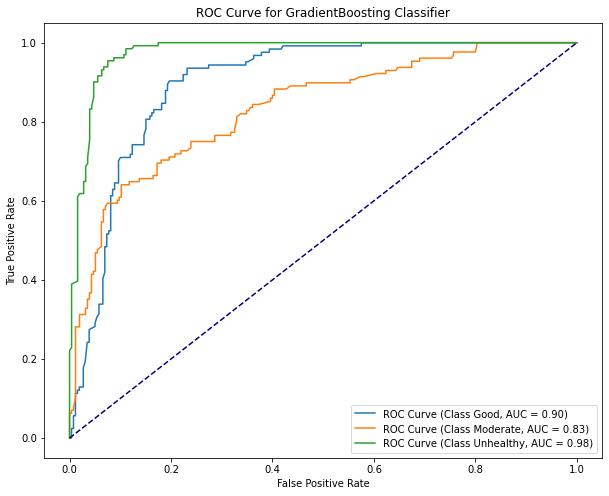


Accuracy: 0.7650130548302873
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       134
           1       0.75      0.63      0.68       139
           2       0.80      1.00      0.89       110

    accuracy                           0.77       383
   macro avg       0.76      0.78      0.77       383
weighted avg       0.76      0.77      0.76       383

AUC Class Good: 0.88
AUC Class Moderate: 0.85
AUC Class Unhealthy: 0.98
Log Loss: 0.5825


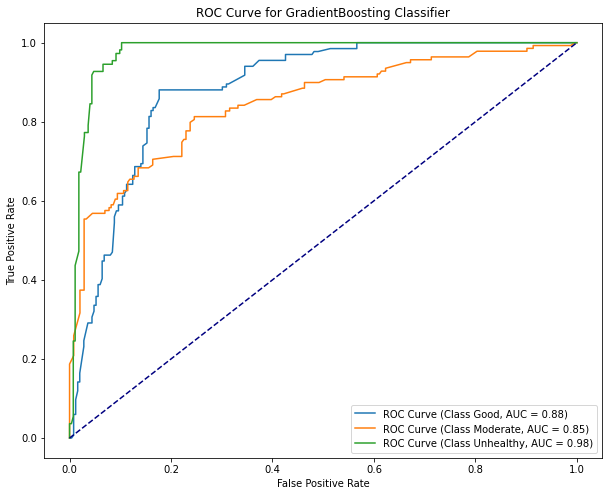


Accuracy: 0.793733681462141
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       122
           1       0.75      0.63      0.69       117
           2       0.87      0.98      0.92       144

    accuracy                           0.79       383
   macro avg       0.78      0.78      0.78       383
weighted avg       0.79      0.79      0.79       383

AUC Class Good: 0.90
AUC Class Moderate: 0.86
AUC Class Unhealthy: 0.98
Log Loss: 0.5454


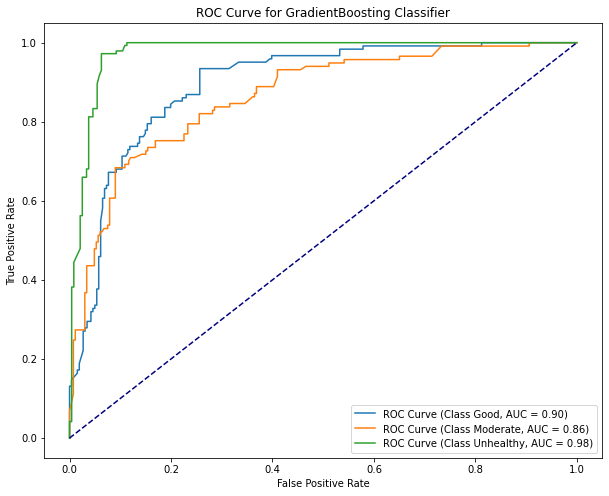


Average Accuracy for 5-fold: 0.7824738903394255
Average AUC for 5-fold: 0.9054826615708913
Average Log Loss for 5-fold: 0.5665758898151033


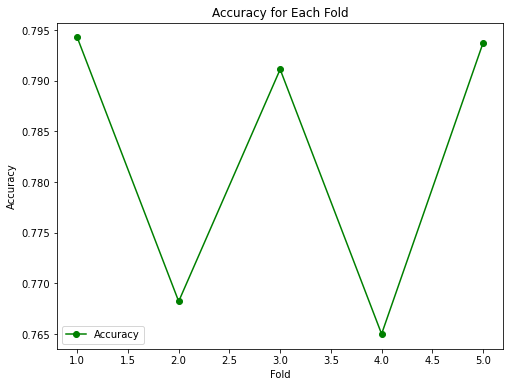

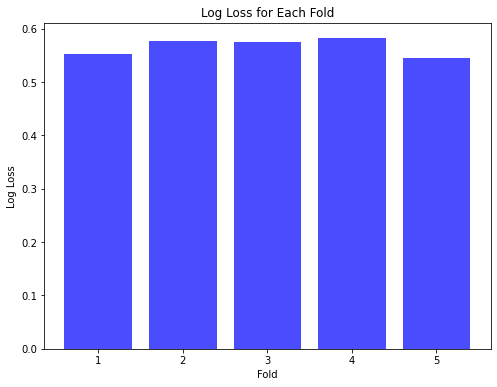


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.794271  0.910055  0.552627
1     2  0.768229  0.900144  0.576618
2     3  0.791123  0.902660  0.575778
3     4  0.765013  0.902755  0.582482
4     5  0.793734  0.911799  0.545375
--------------------------------------------------
KFold=10

Accuracy: 0.7864583333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72        67
           1       0.74      0.67      0.70        69
           2       0.93      1.00      0.97        56

    accuracy                           0.79       192
   macro avg       0.79      0.80      0.79       192
weighted avg       0.78      0.79      0.78       192

AUC Class Good: 0.84
AUC Class Moderate: 0.83
AUC Class Unhealthy: 0.99
Log Loss: 0.5739


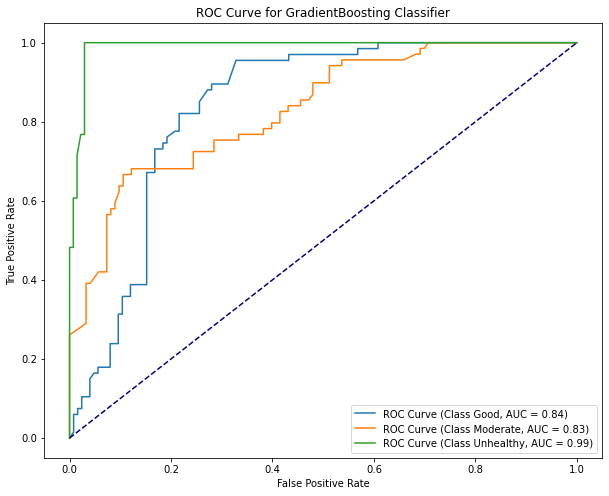


Accuracy: 0.8020833333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73        54
           1       0.84      0.65      0.74        66
           2       0.82      1.00      0.90        72

    accuracy                           0.80       192
   macro avg       0.80      0.79      0.79       192
weighted avg       0.80      0.80      0.80       192

AUC Class Good: 0.89
AUC Class Moderate: 0.90
AUC Class Unhealthy: 0.98
Log Loss: 0.5388


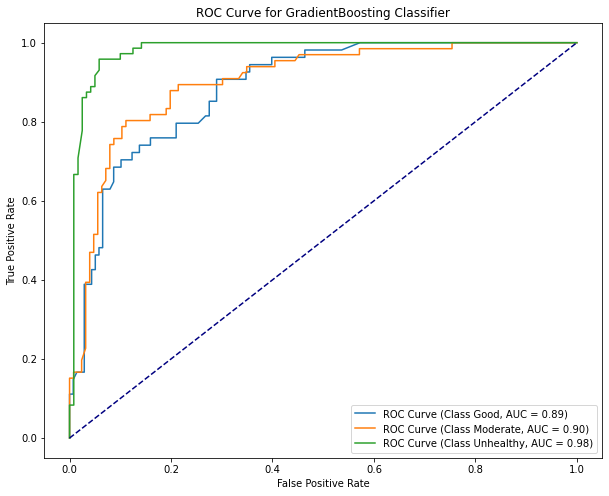


Accuracy: 0.7708333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        75
           1       0.71      0.62      0.66        60
           2       0.81      1.00      0.90        57

    accuracy                           0.77       192
   macro avg       0.77      0.78      0.77       192
weighted avg       0.77      0.77      0.76       192

AUC Class Good: 0.87
AUC Class Moderate: 0.83
AUC Class Unhealthy: 0.99
Log Loss: 0.5688


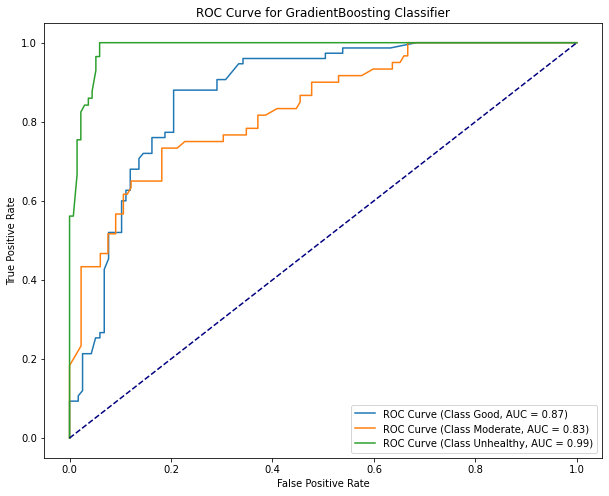


Accuracy: 0.78125
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.65      0.71        63
           1       0.71      0.68      0.69        60
           2       0.84      0.99      0.91        69

    accuracy                           0.78       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.78      0.78      0.77       192

AUC Class Good: 0.89
AUC Class Moderate: 0.86
AUC Class Unhealthy: 0.97
Log Loss: 0.5793


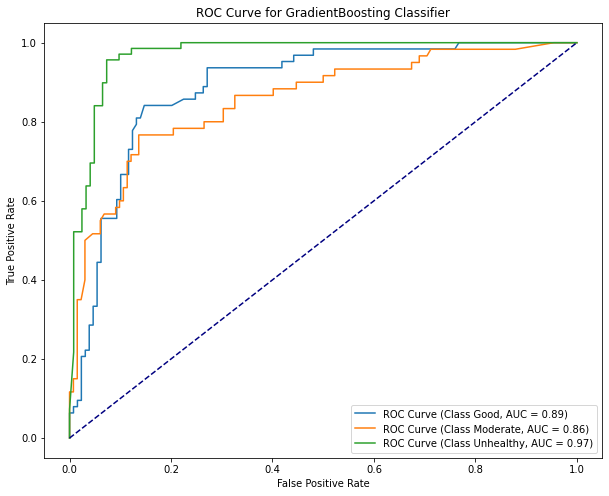


Accuracy: 0.8072916666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78        56
           1       0.81      0.64      0.71        66
           2       0.85      0.97      0.91        70

    accuracy                           0.81       192
   macro avg       0.80      0.80      0.80       192
weighted avg       0.81      0.81      0.80       192

AUC Class Good: 0.92
AUC Class Moderate: 0.85
AUC Class Unhealthy: 0.97
Log Loss: 0.5698


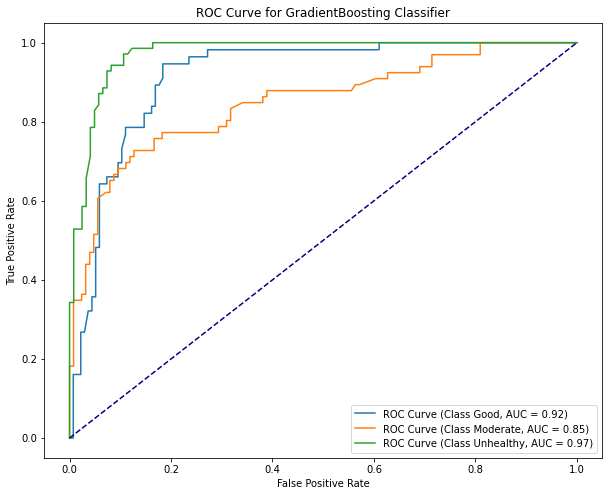


Accuracy: 0.78125
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79        69
           1       0.77      0.53      0.63        62
           2       0.79      1.00      0.88        61

    accuracy                           0.78       192
   macro avg       0.78      0.78      0.77       192
weighted avg       0.78      0.78      0.77       192

AUC Class Good: 0.90
AUC Class Moderate: 0.83
AUC Class Unhealthy: 0.98
Log Loss: 0.5731


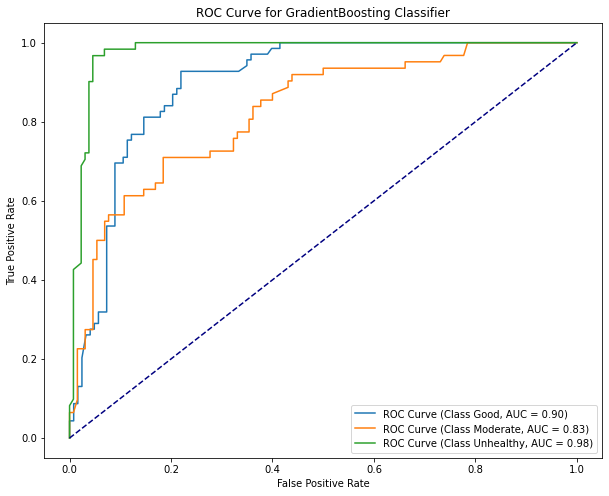


Accuracy: 0.78125
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76        69
           1       0.76      0.63      0.69        67
           2       0.86      0.96      0.91        56

    accuracy                           0.78       192
   macro avg       0.78      0.79      0.78       192
weighted avg       0.78      0.78      0.78       192

AUC Class Good: 0.90
AUC Class Moderate: 0.85
AUC Class Unhealthy: 0.99
Log Loss: 0.5546


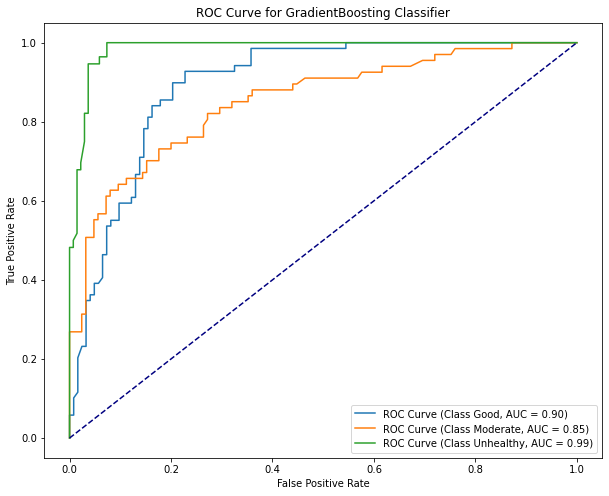


Accuracy: 0.7696335078534031
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.75        64
           1       0.79      0.64      0.71        72
           2       0.76      0.98      0.86        55

    accuracy                           0.77       191
   macro avg       0.77      0.79      0.77       191
weighted avg       0.77      0.77      0.76       191

AUC Class Good: 0.88
AUC Class Moderate: 0.84
AUC Class Unhealthy: 0.97
Log Loss: 0.6066


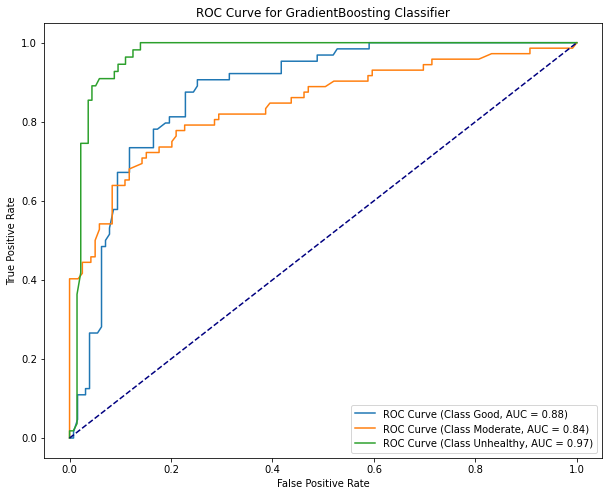


Accuracy: 0.8586387434554974
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82        58
           1       0.83      0.69      0.76        49
           2       0.88      1.00      0.93        84

    accuracy                           0.86       191
   macro avg       0.85      0.83      0.84       191
weighted avg       0.86      0.86      0.85       191

AUC Class Good: 0.92
AUC Class Moderate: 0.91
AUC Class Unhealthy: 0.97
Log Loss: 0.4926


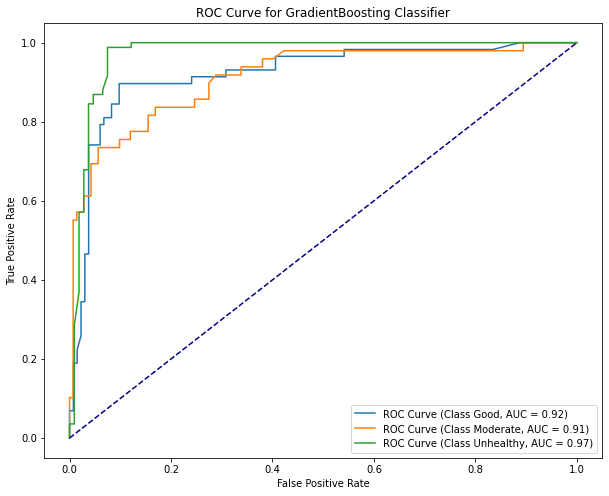


Accuracy: 0.743455497382199
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67        64
           1       0.70      0.62      0.66        68
           2       0.84      0.98      0.91        59

    accuracy                           0.74       191
   macro avg       0.74      0.75      0.74       191
weighted avg       0.74      0.74      0.74       191

AUC Class Good: 0.86
AUC Class Moderate: 0.81
AUC Class Unhealthy: 0.98
Log Loss: 0.6014


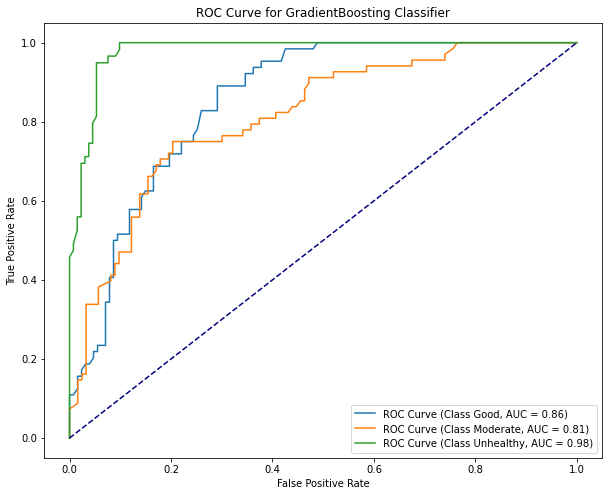


Average Accuracy for 10-fold: 0.7882144415357766
Average AUC for 10-fold: 0.9051970861370379
Average Log Loss for 10-fold: 0.5658734756091061


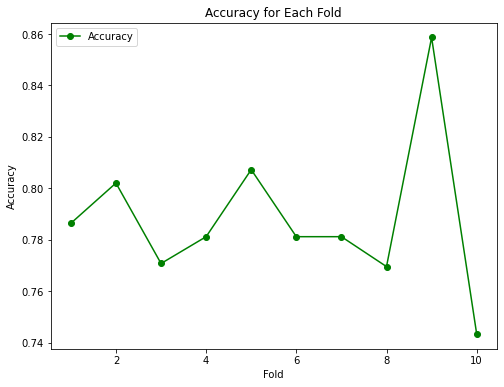

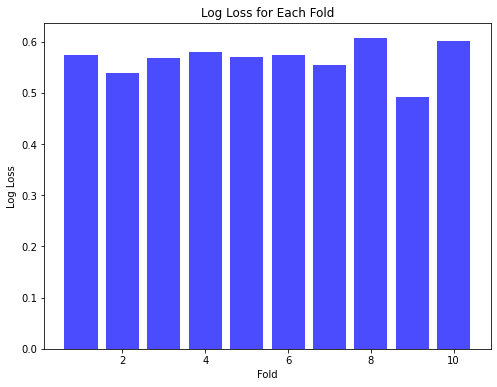


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.786458  0.887601  0.573933
1     2  0.802083  0.922875  0.538781
2     3  0.770833  0.898502  0.568756
3     4  0.781250  0.904639  0.579279
4     5  0.807292  0.912713  0.569794
5     6  0.781250  0.900264  0.573069
6     7  0.781250  0.910627  0.554584
7     8  0.769634  0.896163  0.606553
8     9  0.858639  0.935522  0.492634
9    10  0.743455  0.883065  0.601351
--------------------------------------------------


In [25]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# List of KFolds
kfolds = [5, 10]

for kfold in kfolds:
    print(f"KFold={kfold}")
    kfold_cv = KFold(n_splits=kfold, shuffle=True, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_resampled)

    fold_accuracies = []
    fold_auc_scores = []
    fold_log_losses = []  # Initialize fold_log_losses inside the loop

    for train_index, val_index in kfold_cv.split(X_resampled):
        X_train_kfold, X_val_kfold = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
        y_train_kfold, y_val_kfold = y_encoded[train_index], y_encoded[val_index]

        # Membuat model GradientBoostingClassifier
        gradient_boosting_classifier = GradientBoostingClassifier(max_depth=1, random_state=42)

        # Melatih model
        gradient_boosting_classifier.fit(X_train_kfold, y_train_kfold)

        # Melakukan prediksi pada data validasi
        y_pred = gradient_boosting_classifier.predict(X_val_kfold)

        # Evaluasi model
        accuracy = accuracy_score(y_val_kfold, y_pred)
        report = classification_report(y_val_kfold, y_pred)
        confusion_mat = confusion_matrix(y_val_kfold, y_pred)

        print("\nAccuracy:", accuracy)
        print("Classification Report:\n", report)

        # Menghitung probabilitas prediksi untuk setiap kelas
        y_probabilities = gradient_boosting_classifier.predict_proba(X_val_kfold)

        # Menghitung nilai AUC untuk setiap kelas
        auc_scores = []
        for i in range(gradient_boosting_classifier.n_classes_):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            auc_scores.append(roc_auc)
            print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

        # Menghitung log loss
        logloss = log_loss(y_val_kfold, y_probabilities)
        fold_log_losses.append(logloss)
        print(f'Log Loss: {logloss:.4f}')

        fold_accuracies.append(accuracy)
        fold_auc_scores.append(np.mean(auc_scores))

        # Menampilkan kurva ROC untuk setiap kelas
        plt.figure(figsize=(10, 8))
        for i in range(gradient_boosting_classifier.n_classes_):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for GradientBoosting Classifier')
        plt.legend()

        plt.show()

    # Menampilkan rata-rata akurasi, AUC, dan log loss untuk fold tersebut
    print(f"\nAverage Accuracy for {kfold}-fold:", np.mean(fold_accuracies))
    print(f"Average AUC for {kfold}-fold:", np.mean(fold_auc_scores))
    print(f"Average Log Loss for {kfold}-fold:", np.mean(fold_log_losses))
    
    # Visualisasi Akurasi untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, kfold + 1), fold_accuracies, marker='o', linestyle='-', color='green', label='Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Each Fold')
    plt.legend()
    plt.show()

    # Visualisasi Log Loss untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, kfold + 1), fold_log_losses, color='blue', alpha=0.7)
    plt.xlabel('Fold')
    plt.ylabel('Log Loss')
    plt.title('Log Loss for Each Fold')
    plt.show()
    
    # Menampilkan summary untuk setiap fold
    fold_summary = pd.DataFrame({
        'Fold': np.arange(1, kfold + 1),
        'Accuracy': fold_accuracies,
        'AUC': fold_auc_scores,
        'Log Loss': fold_log_losses
    })
    print("\nFold Summary:")
    print(fold_summary)
    print("--------------------------------------------------")


## CatBoosting FOLD 5 dan 10 SMOTE

KFold=5

Accuracy: 0.9244791666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       121
           1       0.94      0.87      0.91       135
           2       0.95      0.99      0.97       128

    accuracy                           0.92       384
   macro avg       0.92      0.93      0.92       384
weighted avg       0.93      0.92      0.92       384

AUC Class 0: 0.98
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.1926


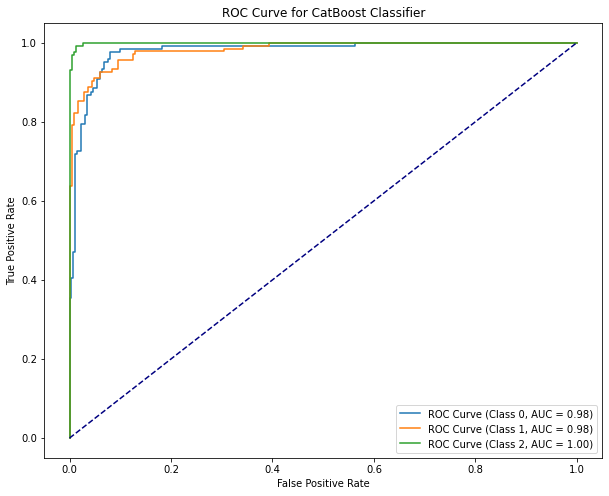


Accuracy: 0.8984375
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       138
           1       0.88      0.85      0.86       120
           2       0.93      0.99      0.96       126

    accuracy                           0.90       384
   macro avg       0.90      0.90      0.90       384
weighted avg       0.90      0.90      0.90       384

AUC Class 0: 0.97
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2561


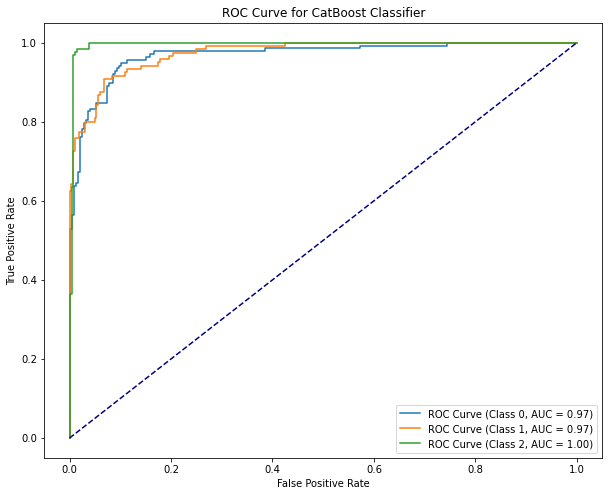


Accuracy: 0.9190600522193212
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       124
           1       0.90      0.87      0.88       128
           2       0.93      0.98      0.96       131

    accuracy                           0.92       383
   macro avg       0.92      0.92      0.92       383
weighted avg       0.92      0.92      0.92       383

AUC Class 0: 0.99
AUC Class 1: 0.98
AUC Class 2: 0.99
Log Loss: 0.2105


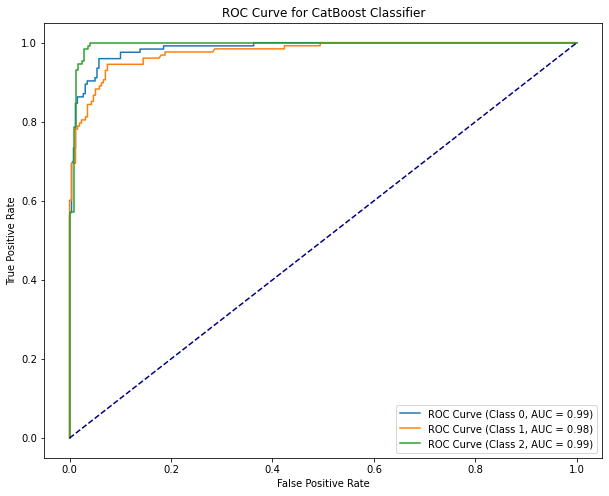


Accuracy: 0.9164490861618799
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       134
           1       0.93      0.83      0.88       139
           2       0.92      1.00      0.96       110

    accuracy                           0.92       383
   macro avg       0.92      0.92      0.92       383
weighted avg       0.92      0.92      0.92       383

AUC Class 0: 0.98
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2072


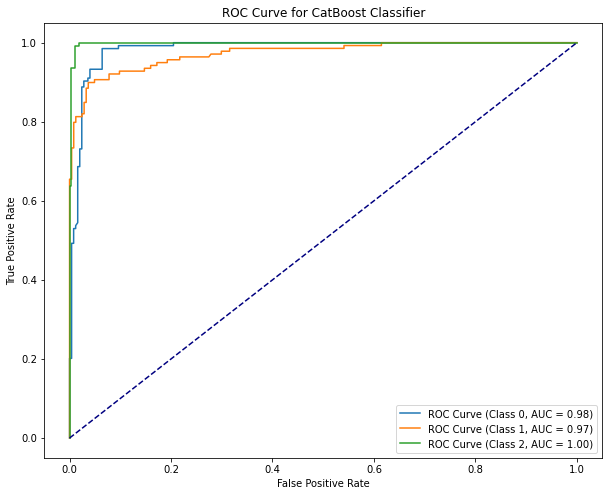


Accuracy: 0.9138381201044387
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       122
           1       0.90      0.83      0.86       117
           2       0.94      1.00      0.97       144

    accuracy                           0.91       383
   macro avg       0.91      0.91      0.91       383
weighted avg       0.91      0.91      0.91       383

AUC Class 0: 0.98
AUC Class 1: 0.96
AUC Class 2: 1.00
Log Loss: 0.2569


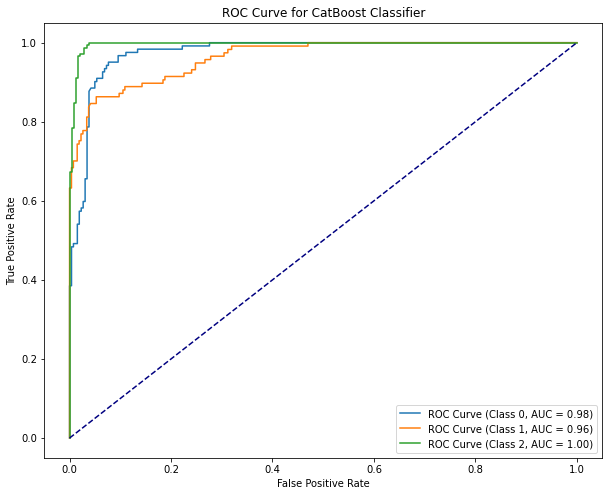


Average Accuracy for 5-fold: 0.9144527850304612
Average AUC for 5-fold: 0.9830484413504156
Average Log Loss for 5-fold: 0.22464113696358817


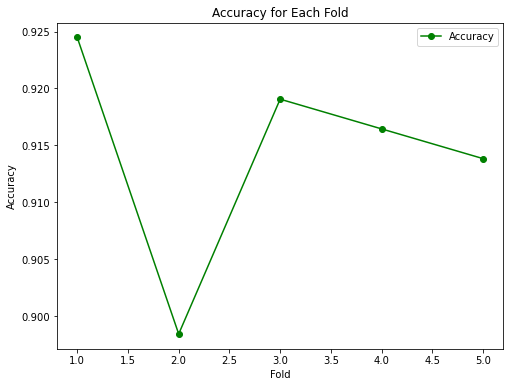

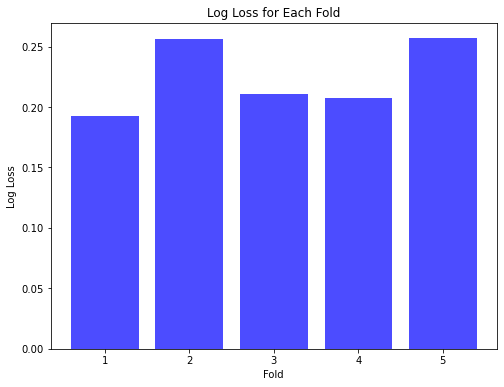


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.924479  0.986825  0.192587
1     2  0.898438  0.979358  0.256074
2     3  0.919060  0.985669  0.210492
3     4  0.916449  0.985091  0.207164
4     5  0.913838  0.978299  0.256889
--------------------------------------------------
KFold=10

Accuracy: 0.9479166666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        67
           1       0.98      0.90      0.94        69
           2       0.97      1.00      0.98        56

    accuracy                           0.95       192
   macro avg       0.95      0.95      0.95       192
weighted avg       0.95      0.95      0.95       192

AUC Class 0: 0.98
AUC Class 1: 0.99
AUC Class 2: 1.00
Log Loss: 0.1751


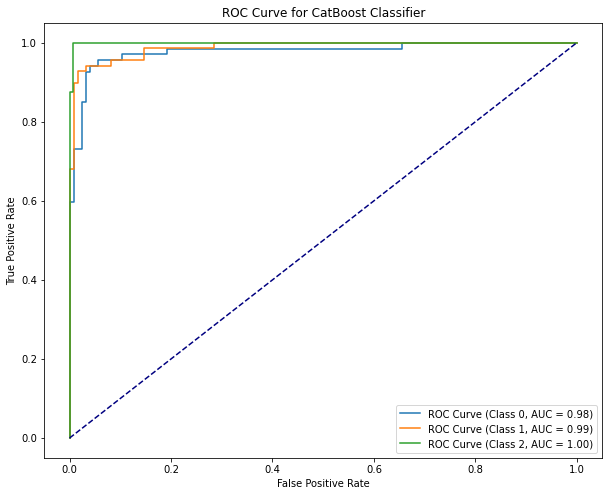


Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        54
           1       0.90      0.86      0.88        66
           2       0.95      1.00      0.97        72

    accuracy                           0.92       192
   macro avg       0.91      0.91      0.91       192
weighted avg       0.92      0.92      0.92       192

AUC Class 0: 0.98
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.2038


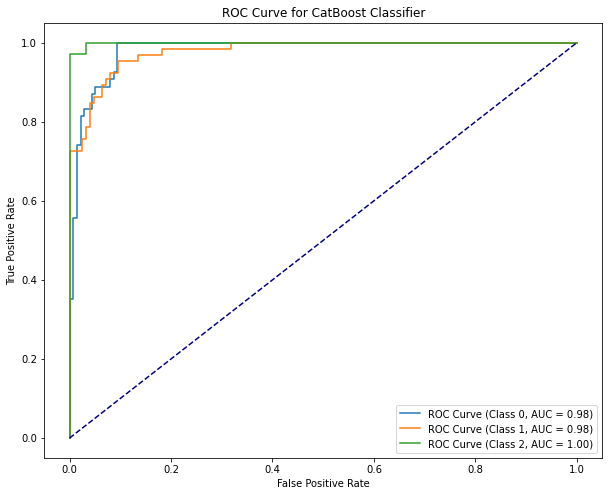


Accuracy: 0.8854166666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        75
           1       0.83      0.83      0.83        60
           2       0.92      1.00      0.96        57

    accuracy                           0.89       192
   macro avg       0.88      0.89      0.89       192
weighted avg       0.88      0.89      0.88       192

AUC Class 0: 0.97
AUC Class 1: 0.96
AUC Class 2: 0.99
Log Loss: 0.2856


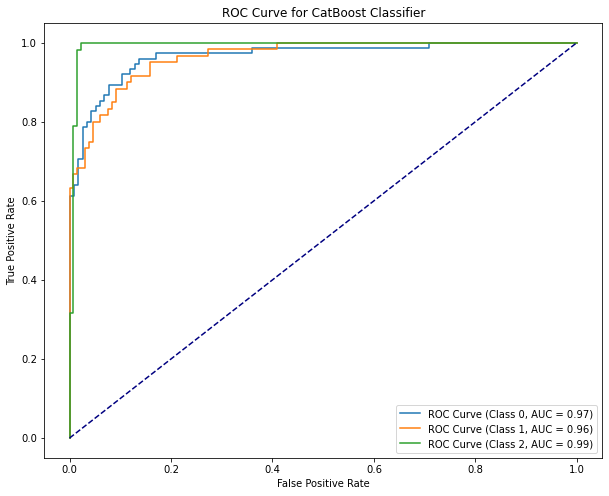


Accuracy: 0.9270833333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90        63
           1       0.93      0.90      0.92        60
           2       0.94      0.99      0.96        69

    accuracy                           0.93       192
   macro avg       0.93      0.92      0.93       192
weighted avg       0.93      0.93      0.93       192

AUC Class 0: 0.98
AUC Class 1: 0.99
AUC Class 2: 1.00
Log Loss: 0.1830


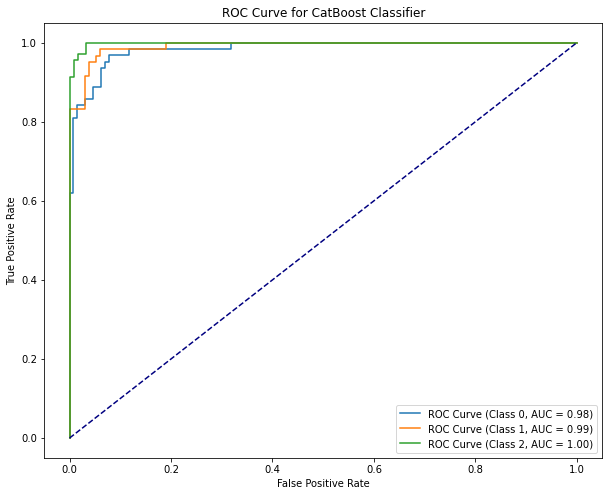


Accuracy: 0.9270833333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        56
           1       0.92      0.89      0.91        66
           2       0.92      1.00      0.96        70

    accuracy                           0.93       192
   macro avg       0.93      0.92      0.92       192
weighted avg       0.93      0.93      0.93       192

AUC Class 0: 0.99
AUC Class 1: 0.98
AUC Class 2: 0.99
Log Loss: 0.1813


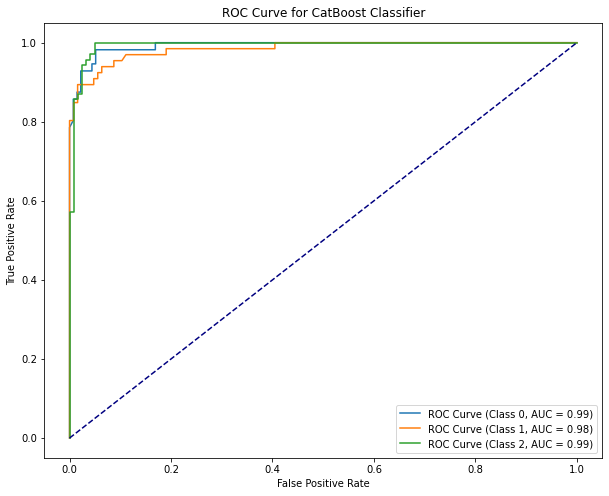


Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        69
           1       0.88      0.85      0.87        62
           2       0.95      0.98      0.97        61

    accuracy                           0.92       192
   macro avg       0.92      0.92      0.92       192
weighted avg       0.92      0.92      0.92       192

AUC Class 0: 0.98
AUC Class 1: 0.96
AUC Class 2: 1.00
Log Loss: 0.2418


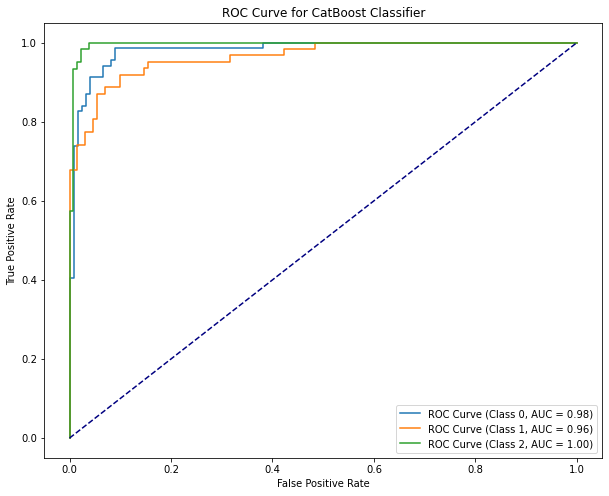


Accuracy: 0.9270833333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        69
           1       0.92      0.88      0.90        67
           2       0.92      1.00      0.96        56

    accuracy                           0.93       192
   macro avg       0.93      0.93      0.93       192
weighted avg       0.93      0.93      0.93       192

AUC Class 0: 0.98
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.1962


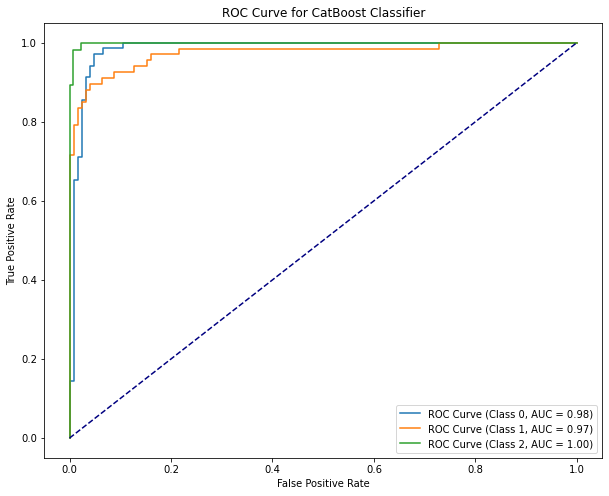


Accuracy: 0.9109947643979057
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90        64
           1       0.94      0.82      0.87        72
           2       0.93      1.00      0.96        55

    accuracy                           0.91       191
   macro avg       0.91      0.92      0.91       191
weighted avg       0.91      0.91      0.91       191

AUC Class 0: 0.98
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2278


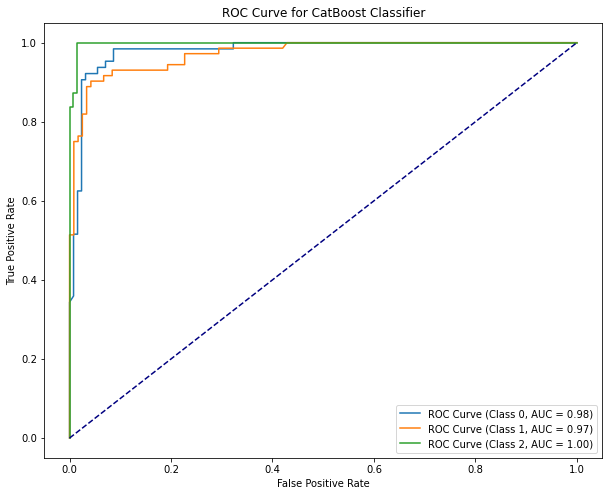


Accuracy: 0.9424083769633508
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        58
           1       0.91      0.88      0.90        49
           2       0.97      1.00      0.98        84

    accuracy                           0.94       191
   macro avg       0.94      0.93      0.93       191
weighted avg       0.94      0.94      0.94       191

AUC Class 0: 0.98
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.1980


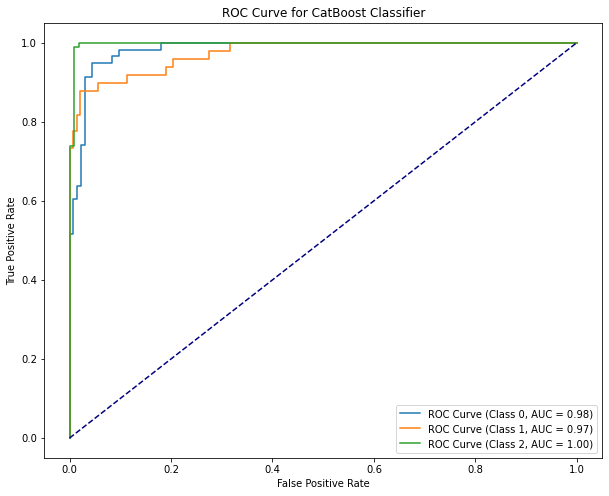


Accuracy: 0.8848167539267016
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        64
           1       0.89      0.79      0.84        68
           2       0.89      1.00      0.94        59

    accuracy                           0.88       191
   macro avg       0.88      0.89      0.89       191
weighted avg       0.88      0.88      0.88       191

AUC Class 0: 0.97
AUC Class 1: 0.95
AUC Class 2: 0.99
Log Loss: 0.3078


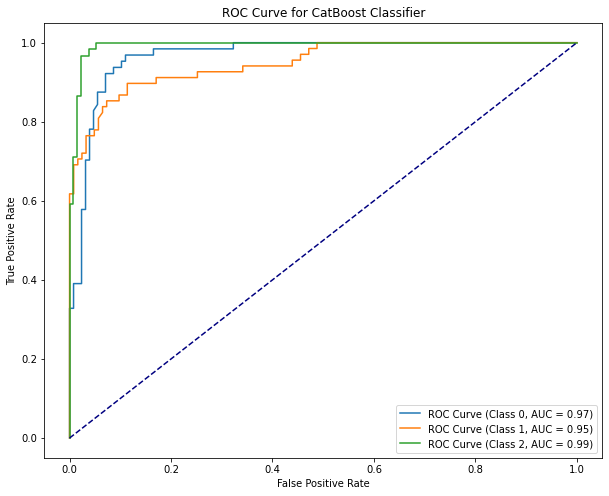


Average Accuracy for 10-fold: 0.9186136561954624
Average AUC for 10-fold: 0.9834808906628277
Average Log Loss for 10-fold: 0.22005276518207362


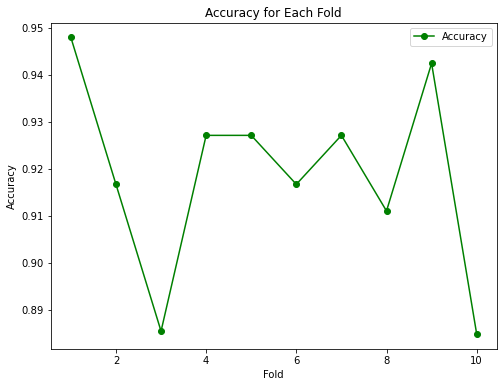

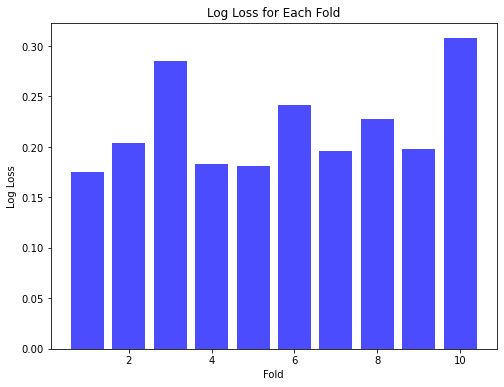


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.947917  0.988286  0.175125
1     2  0.916667  0.986209  0.203843
2     3  0.885417  0.974555  0.285643
3     4  0.927083  0.991170  0.183028
4     5  0.927083  0.990029  0.181273
5     6  0.916667  0.980461  0.241796
6     7  0.927083  0.985749  0.196230
7     8  0.910995  0.983463  0.227775
8     9  0.942408  0.985084  0.198033
9    10  0.884817  0.969804  0.307781
--------------------------------------------------


In [26]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# List of KFolds
kfolds = [5, 10]

for kfold in kfolds:
    print(f"KFold={kfold}")
    kfold_cv = KFold(n_splits=kfold, shuffle=True, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_resampled)

    fold_accuracies = []
    fold_auc_scores = []
    fold_log_losses = []

    for train_index, val_index in kfold_cv.split(X_resampled):
        X_train_kfold, X_val_kfold = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
        y_train_kfold, y_val_kfold = y_encoded[train_index], y_encoded[val_index]

        # Membuat model CatBoost
        catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

        # Melatih model
        catboost_classifier.fit(X_train_kfold, y_train_kfold)

        # Melakukan prediksi pada data validasi
        y_pred = catboost_classifier.predict(X_val_kfold)

        # Evaluasi model
        accuracy = accuracy_score(y_val_kfold, y_pred)
        report = classification_report(y_val_kfold, y_pred)
        confusion_mat = confusion_matrix(y_val_kfold, y_pred)

        print("\nAccuracy:", accuracy)
        print("Classification Report:\n", report)

        # Menghitung probabilitas prediksi untuk setiap kelas
        y_probabilities = catboost_classifier.predict_proba(X_val_kfold)

        # Menghitung nilai AUC untuk setiap kelas
        auc_scores = []
        classes = catboost_classifier.classes_
        for i in range(len(classes)):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            auc_scores.append(roc_auc)
            print(f"AUC Class {classes[i]}: {roc_auc:.2f}")

        # Menghitung log loss
        logloss = log_loss(y_val_kfold, y_probabilities)
        fold_log_losses.append(logloss)
        print(f'Log Loss: {logloss:.4f}')

        fold_accuracies.append(accuracy)
        fold_auc_scores.append(np.mean(auc_scores))

        # Menampilkan kurva ROC untuk setiap kelas
        plt.figure(figsize=(10, 8))
        for i in range(len(classes)):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"ROC Curve (Class {classes[i]}, AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for CatBoost Classifier')
        plt.legend()

        plt.show()

    # Menampilkan rata-rata akurasi, AUC, dan log loss untuk fold tersebut
    print(f"\nAverage Accuracy for {kfold}-fold:", np.mean(fold_accuracies))
    print(f"Average AUC for {kfold}-fold:", np.mean(fold_auc_scores))
    print(f"Average Log Loss for {kfold}-fold:", np.mean(fold_log_losses))

    # Visualisasi Akurasi untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, kfold + 1), fold_accuracies, marker='o', linestyle='-', color='green', label='Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Each Fold')
    plt.legend()
    plt.show()

    # Visualisasi Log Loss untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, kfold + 1), fold_log_losses, color='blue', alpha=0.7)
    plt.xlabel('Fold')
    plt.ylabel('Log Loss')
    plt.title('Log Loss for Each Fold')
    plt.show()
    
    # Menampilkan summary untuk setiap fold
    fold_summary = pd.DataFrame({
        'Fold': np.arange(1, kfold + 1),
        'Accuracy': fold_accuracies,
        'AUC': fold_auc_scores,
        'Log Loss': fold_log_losses
    })
    print("\nFold Summary:")
    print(fold_summary)

    print("--------------------------------------------------")
